In [ ]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 데이터베이스 연결 설정
config = {
  'user': 'root',
  'password': '00000000',
  'host': 'localhost',
  'database': 'zerobase',
  'raise_on_warnings': True
}

# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select count(*)
                  from (
                        select customer_unique_id, count(customer_unique_id) as customer_count
                        from olist_customers_dataset
                        group by customer_unique_id
                        having count(customer_unique_id) > 1
                        order by count(customer_unique_id)
                  ) a
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

# 커서 및 연결 닫기
cursor.close()
# connection.close()


(2997,)


True

* 고객 중 2번 이상 구매한 고객은 2,997명이다.

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select count(*)
#                   from olist_customers_dataset a
#                   where a.customer_id not in (
#                     select b.customer_id
#                     from olist_orders_dataset b
#                   )
# ''')
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# # 커서 및 연결 닫기
# cursor.close()

* 고객 테이블 고객id와 주문 테이블 고객id가 1:1 대응이다. 즉, 미사용 고객은 없다.

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select
#                     b.customer_unique_id,
#                     a.customer_id,
#                     a.order_id,
#                     a.order_status,
#                     a.order_purchase_timestamp,
#                     a.order_approved_at,
#                     a.order_delivered_carrier_date,
#                     a.order_delivered_customer_date,
#                     a.order_estimated_delivery_date
#                   from olist_orders_dataset a
#                   left join olist_customers_dataset b
#                   on a.customer_id = b.customer_id
#                   group by b.customer_unique_id, a.customer_id, a.order_id, a.order_status, a.order_purchase_timestamp, a.order_approved_at, a.order_delivered_carrier_date, a.order_delivered_customer_date, a.order_estimated_delivery_date
#                   order by b.customer_unique_id
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 결과를 데이터프레임으로 저장
# df_one_on_one = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_one_on_one

* 고객이 주문 할 때 customer_id가 생기고, 이는 order_id와 결합된다.
* 즉, 한 건의 주문(order_id)가 생성되면, customer_id가 하나 생성된다.

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select distinct customer_unique_id
#                   from olist_customers_dataset
#                   where customer_unique_id not in (
#                     select distinct e.customer_unique_id
#                     from olist_customers_dataset e
#                     left join olist_orders_dataset f
#                     on e.customer_id = f.customer_id
#                     where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                   )
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 휴면고객 고유id 명단
# # 고유id로 뽑은 이유: 한 사람이 두 건 이상 주문했을 시 customer_id는 새로 생성되기 때문에 고유id로 개인이 몇 번 주문했는지 알 수 있다.
# df_sleep_customer_unique_id = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_unique_id

* 휴면고객은 총 43,347명이다.

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select
#                     b.customer_unique_id,
#                     a.customer_id,
#                     a.order_id,
#                     a.order_status,
#                     a.order_purchase_timestamp,
#                     a.order_approved_at,
#                     a.order_delivered_carrier_date,
#                     a.order_delivered_customer_date,
#                     a.order_estimated_delivery_date
#                   from olist_orders_dataset a
#                   left join olist_customers_dataset b
#                   on a.customer_id = b.customer_id
#                   where b.customer_unique_id in (
#                     select distinct customer_unique_id
#                     from olist_customers_dataset
#                     where customer_unique_id not in (
#                         select distinct e.customer_unique_id
#                         from olist_customers_dataset e
#                         left join olist_orders_dataset f
#                         on e.customer_id = f.customer_id
#                         where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                     )
#                   )
#                   group by
#                     b.customer_unique_id,
#                     a.customer_id,
#                     a.order_id,
#                     a.order_status,
#                     a.order_purchase_timestamp,
#                     a.order_approved_at,
#                     a.order_delivered_carrier_date,
#                     a.order_delivered_customer_date,
#                     a.order_estimated_delivery_date
#                   order by b.customer_unique_id
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 휴면고객 데이터셋
# df_sleep_customer_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_dataset

* 휴면고객 데이터셋은 총 44,639행. 즉, 두 번 이상 구매한 고객이 있다.

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select
#                     product_category_name_english,
#                     count(distinct order_id),
#                     round(avg(price), 2),
#                     round(avg(product_weight_g), 2),
#                     round(avg(review_score), 2)
#                   from (
#                     select
#                     a.customer_id,
#                     b.order_id,
#                     d.product_category_name_english,
#                     b.price,
#                     c.product_weight_g,
#                     e.review_score
#                     from (
#                         select
#                             b.customer_unique_id,
#                             a.customer_id,
#                             a.order_id,
#                             a.order_status,
#                             a.order_purchase_timestamp,
#                             a.order_approved_at,
#                             a.order_delivered_carrier_date,
#                             a.order_delivered_customer_date,
#                             a.order_estimated_delivery_date
#                         from olist_orders_dataset a
#                         left join olist_customers_dataset b
#                         on a.customer_id = b.customer_id
#                         where b.customer_unique_id in (
#                             select distinct customer_unique_id
#                             from olist_customers_dataset
#                             where customer_unique_id not in (
#                                 select distinct e.customer_unique_id
#                                 from olist_customers_dataset e
#                                 left join olist_orders_dataset f
#                                 on e.customer_id = f.customer_id
#                                 where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                             )
#                         )
#                         group by b.customer_unique_id,
#                             a.customer_id,
#                             a.order_id,
#                             a.order_status,
#                             a.order_purchase_timestamp,
#                             a.order_approved_at,
#                             a.order_delivered_carrier_date,
#                             a.order_delivered_customer_date,
#                             a.order_estimated_delivery_date
#                         order by b.customer_unique_id
#                     ) a
#                     left join olist_order_items_dataset b
#                     on a.order_id = b.order_id
#                     left join olist_products_dataset c
#                     on b.product_id = c.product_id
#                     left join product_category_name_translation d
#                     on c.product_category_name = d.product_category_name
#                     left join olist_order_reviews_dataset e
#                     on a.order_id = e.order_id
#                     group by a.customer_id, b.order_id,
#                         d.product_category_name_english,
#                         b.price,
#                         c.product_weight_g,
#                         e.review_score
#                   ) last_order
#                   group by product_category_name_english
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 휴면고객들이 물건을 구입한 품목 및 평점

# df_sleep_customer_orders_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_orders_dataset

* 휴면고객들의 평점 평균 또한 괜찮았음. 어떤것 때문에 1년이상 물건을 구매하지 않을까?

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select a.customer_id, a.order_id, a.order_purchase_timestamp, b.review_score, b.review_comment_message
#                   from olist_orders_dataset a
#                   left join olist_order_reviews_dataset b
#                   on a.order_id = b.order_id
#                   inner join olist_customers_dataset c
#                   on a.customer_id = c.customer_id
#                   where c.customer_unique_id in (
#                         select distinct customer_unique_id
#                         from olist_customers_dataset
#                         where customer_unique_id not in (
#                             select distinct e.customer_unique_id
#                             from olist_customers_dataset e
#                             left join olist_orders_dataset f
#                             on e.customer_id = f.customer_id
#                             where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                         )
#                   )
#                   group by a.customer_id, a.order_id, a.order_purchase_timestamp, b.review_score, b.review_comment_message
#                   order by DATE_FORMAT(a.order_purchase_timestamp, '%Y-%m-%d') DESC
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 휴면고객들의 리뷰 데이터셋
# df_sleep_customer_reviews_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_reviews_dataset

* 리뷰로 파악하려 했으나, 스페인어 모르겠음.
* 번역 하는 걸로 대치가능한지 찾아봐야하려나..?
* 일단 스킵

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select a.*, b.customer_zip_code_prefix, b.customer_city, b.customer_state, c.avg_latitude, c.avg_longitude
#                   from olist_orders_dataset a
#                   left join olist_customers_dataset b
#                   on a.customer_id  = b.customer_id
#                   left join (
#                     SELECT
#                         geolocation_zip_code_prefix,
#                         AVG(geolocation_lat) as avg_latitude,
#                         AVG(geolocation_lng) as avg_longitude,
#                         geolocation_city,
#                         geolocation_state
#                     FROM olist_geolocation_dataset
#                     GROUP BY geolocation_zip_code_prefix, geolocation_city, geolocation_state
#                   ) c
#                   on b.customer_zip_code_prefix = c.geolocation_zip_code_prefix
#                   where b.customer_unique_id in (
#                     select distinct customer_unique_id
#                     from olist_customers_dataset
#                     where customer_unique_id not in (
#                         select distinct e.customer_unique_id
#                         from olist_customers_dataset e
#                         left join olist_orders_dataset f
#                         on e.customer_id = f.customer_id
#                         where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                     )
#                   )
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 휴면 고객의 지역 특성
# df_sleep_customer_geo_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_geo_dataset

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select a.customer_unique_id
#                   from olist_customers_dataset a
#                   left join olist_orders_dataset b
#                   on a.customer_id = b.customer_id
#                   where a.customer_unique_id in (
#                     select distinct customer_unique_id
#                     from olist_customers_dataset
#                     where customer_unique_id not in (
#                         select distinct e.customer_unique_id
#                         from olist_customers_dataset e
#                         left join olist_orders_dataset f
#                         on e.customer_id = f.customer_id
#                         where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                     )
#                   )
#                   group by a.customer_unique_id
#                   having count(a.customer_id) > 1
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 두 번 이상 주문한 휴면 고객
# df_sleep_customer_many_order_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_many_order_dataset

* 두번 이상 주문한 고객은 총 1,198명이다.

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select d.product_category_name_english, e.customer_unique_id, e.customer_id, a.order_purchase_timestamp
#                   from olist_orders_dataset a
#                   left join olist_order_items_dataset b
#                   on a.order_id = b.order_id
#                   left join olist_products_dataset c
#                   on b.product_id = c.product_id
#                   left join product_category_name_translation d
#                   on c.product_category_name = d.product_category_name
#                   inner join olist_customers_dataset e
#                   on a.customer_id = e.customer_id
#                   where e.customer_unique_id in (
#                     select a.customer_unique_id
#                     from olist_customers_dataset a
#                     left join olist_orders_dataset b
#                     on a.customer_id = b.customer_id
#                     where a.customer_unique_id in (
#                         select distinct customer_unique_id
#                         from olist_customers_dataset
#                         where customer_unique_id not in (
#                             select distinct e.customer_unique_id
#                             from olist_customers_dataset e
#                             left join olist_orders_dataset f
#                             on e.customer_id = f.customer_id
#                             where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                         )
#                     )
#                     group by a.customer_unique_id
#                     having count(a.customer_id) > 1
#                   )
#                   and b.order_item_id = 1
#                   group by d.product_category_name_english, e.customer_unique_id, e.customer_id, a.order_purchase_timestamp
#                   order by e.customer_unique_id
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
# df_sleep_customer_many_what_purchased_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_many_what_purchased_dataset

In [ ]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select z.customer_unique_id, y.*
#                   from olist_orders_dataset x
#                   left join olist_order_payments_dataset y
#                   on x.order_id = y.order_id
#                   left join olist_customers_dataset z
#                   on x.customer_id = z.customer_id
#                   where z.customer_unique_id in (
#                     select distinct customer_unique_id
#                     from olist_customers_dataset
#                     where customer_unique_id not in (
#                         select distinct e.customer_unique_id
#                         from olist_customers_dataset e
#                         left join olist_orders_dataset f
#                         on e.customer_id = f.customer_id
#                         where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
#                     )
#                   )
#                   order by z.customer_unique_id
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
# df_sleep_customer_payments_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_sleep_customer_payments_dataset

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. 기초 통계 정보 제공
# print(df_sleep_customer_dataset.describe())

# # 2. 결측치 확인
# print(df_sleep_customer_dataset.isnull().sum())

# # 3. 각 변수별 분포 확인
# # order_status 분포 확인
# sns.countplot(data=df_sleep_customer_dataset, x='order_status')
# plt.show()

# # order_purchase_timestamp의 월별 주문량
# df_sleep_customer_dataset['order_purchase_timestamp'] = pd.to_datetime(df_sleep_customer_dataset['order_purchase_timestamp'])
# df_sleep_customer_dataset['order_purchase_month'] = df_sleep_customer_dataset['order_purchase_timestamp'].dt.month
# sns.countplot(data=df_sleep_customer_dataset, x='order_purchase_month')
# plt.show()

# # 4. 주요 변수 간 관계 확인
# # 예: order_status에 따른 order_approved_at와 order_delivered_customer_date의 차이
# df_sleep_customer_dataset['order_delivered_customer_date'] = pd.to_datetime(df_sleep_customer_dataset['order_delivered_customer_date'])
# df_sleep_customer_dataset['order_approved_at'] = pd.to_datetime(df_sleep_customer_dataset['order_approved_at'])

# df_sleep_customer_dataset['approval_duration'] = (df_sleep_customer_dataset['order_delivered_customer_date'] - df_sleep_customer_dataset['order_approved_at']).dt.days
# sns.boxplot(data=df_sleep_customer_dataset, x='order_status', y='approval_duration')
# plt.show()


In [ ]:

# # 1. 기초 통계 정보 제공
# print(df_sleep_customer_orders_dataset.describe())

# # 2. 결측치 확인
# print(df_sleep_customer_orders_dataset.isnull().sum())

# # 3. 각 변수별 분포 확인
# # 카테고리 별 평균 가격 분포 확인
# plt.figure(figsize=(15,6))
# sns.barplot(data=df_sleep_customer_orders_dataset, x='product_category_name_english', y='round(avg(price), 2)')
# plt.xticks(rotation=90)
# plt.title('Average Price by Product Category')
# plt.show()

# # 카테고리 별 평균 무게 분포 확인
# plt.figure(figsize=(15,6))
# sns.barplot(data=df_sleep_customer_orders_dataset, x='product_category_name_english', y='round(avg(product_weight_g), 2)')
# plt.xticks(rotation=90)
# plt.title('Average Weight by Product Category')
# plt.show()

# # 카테고리 별 평균 리뷰 점수 분포 확인
# # Calculate average review scores for each product category
# avg_review_scores = df_sleep_customer_orders_dataset.groupby('product_category_name_english')['round(avg(review_score), 2)'].mean().reset_index()

# # Plot the results
# plt.figure(figsize=(15,6))
# sns.barplot(data=avg_review_scores, x='product_category_name_english', y='round(avg(review_score), 2)')
# plt.xticks(rotation=90)
# plt.title('Average Review Score by Product Category')
# plt.show()

# # 4. 주요 변수 간 관계 확인
# # 예: 평균 가격과 평균 리뷰 점수의 관계
# plt.figure(figsize=(10,6))
# sns.scatterplot(data=df_sleep_customer_orders_dataset, x='round(avg(price), 2)', y='round(avg(review_score), 2)')
# plt.title('Relationship between Average Price and Review Score')
# plt.show()



In [ ]:

# # 1. 기초 통계 정보 제공
# print(df_sleep_customer_geo_dataset.describe())

# # 2. 결측치 확인
# print(df_sleep_customer_geo_dataset.isnull().sum())

# # 3. 주문 상태에 따른 주문 수 확인
# plt.figure(figsize=(10,6))
# sns.countplot(data=df_sleep_customer_geo_dataset, x='order_status')
# plt.title('Order Count by Status')
# plt.show()

# # 4. 시간 경과에 따른 주문 수 확인
# df_sleep_customer_geo_dataset['order_purchase_date'] = pd.to_datetime(df_sleep_customer_geo_dataset['order_purchase_timestamp']).dt.date
# plt.figure(figsize=(15,6))
# df_sleep_customer_geo_dataset.groupby('order_purchase_date').size().plot()
# plt.title('Order Count Over Time')
# plt.ylabel('Number of Orders')
# plt.show()

# # 5. 주요 도시 및 주별 주문 수 확인
# top_cities = df_sleep_customer_geo_dataset['customer_city'].value_counts().head(10).index
# plt.figure(figsize=(12,6))
# sns.countplot(data=df_sleep_customer_geo_dataset[df_sleep_customer_geo_dataset['customer_city'].isin(top_cities)], x='customer_city', order=top_cities)
# plt.title('Top 10 Cities by Order Count')
# plt.xticks(rotation=45)
# plt.show()

# top_states = df_sleep_customer_geo_dataset['customer_state'].value_counts().head(10).index
# plt.figure(figsize=(12,6))
# sns.countplot(data=df_sleep_customer_geo_dataset, x='customer_state', order=top_states)
# plt.title('Top 10 States by Order Count')
# plt.show()

# # 6. 평균 위도 및 경도를 사용한 지리적 분포 확인
# plt.figure(figsize=(12,8))
# sns.scatterplot(data=df_sleep_customer_geo_dataset, x='avg_longitude', y='avg_latitude', hue='customer_state', palette='tab20', alpha=0.5)
# plt.title('Geographic Distribution of Orders')
# plt.show()


In [ ]:

# # 1. 기초 통계 정보 제공
# print(df_sleep_customer_many_what_purchased_dataset.describe(include='all'))

# # 2. 결측치 확인
# print(df_sleep_customer_many_what_purchased_dataset.isnull().sum())

# # 3. 상품 카테고리별 주문 수 확인
# plt.figure(figsize=(15,7))
# sns.countplot(data=df_sleep_customer_many_what_purchased_dataset, x='product_category_name_english', order=df_sleep_customer_many_what_purchased_dataset['product_category_name_english'].value_counts().index)
# plt.title('Order Count by Product Category')
# plt.xticks(rotation=90)
# plt.show()

# # 4. 고객별 주문 수 확인
# customer_order_counts = df_sleep_customer_many_what_purchased_dataset['customer_unique_id'].value_counts()
# plt.figure(figsize=(15,7))
# sns.histplot(customer_order_counts, bins=50)
# plt.title('Distribution of Orders per Customer')
# plt.xlabel('Number of Orders')
# plt.ylabel('Number of Customers')
# plt.show()

# # 5. 시간 경과에 따른 주문 수 확인
# df_sleep_customer_many_what_purchased_dataset['order_purchase_date'] = pd.to_datetime(df_sleep_customer_many_what_purchased_dataset['order_purchase_timestamp']).dt.date
# plt.figure(figsize=(15,7))
# df_sleep_customer_many_what_purchased_dataset.groupby('order_purchase_date').size().plot()
# plt.title('Order Count Over Time')
# plt.ylabel('Number of Orders')
# plt.show()


In [ ]:

# # 1. 기초 통계 정보 제공
# print(df_sleep_customer_payments_dataset.describe(include='all'))

# # 2. 결측치 확인
# print(df_sleep_customer_payments_dataset.isnull().sum())

# # 3. 결제 유형별 분포 확인
# plt.figure(figsize=(8,5))
# sns.countplot(data=df_sleep_customer_payments_dataset, x='payment_type')
# plt.title('Distribution of Payment Types')
# plt.ylabel('Number of Transactions')
# plt.show()

# # 4. 할부 개월 수별 분포 확인
# plt.figure(figsize=(10,5))
# sns.countplot(data=df_sleep_customer_payments_dataset, x='payment_installments')
# plt.title('Distribution of Payment Installments')
# plt.ylabel('Number of Transactions')
# plt.xlabel('Number of Installments')
# plt.show()

# # 5. 결제 금액의 분포 확인
# plt.figure(figsize=(12,6))
# sns.histplot(df_sleep_customer_payments_dataset['payment_value'], bins=100, kde=True)
# plt.title('Distribution of Payment Values')
# plt.xlabel('Payment Value')
# plt.ylabel('Number of Transactions')
# plt.show()


In [ ]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
    select
        a.order_id,
        a.customer_id,
        a.order_status,
        a.order_purchase_timestamp,
        a.order_approved_at,
        a.order_delivered_carrier_date,
        a.order_delivered_customer_date,
        a.order_estimated_delivery_date,
        b.order_item_id,
        b.product_id,
        b.seller_id,
        b.shipping_limit_date,
        b.price,
        b.freight_value,
        e.product_category_name_english,
        c.product_name_lenght,
        c.product_description_lenght,
        c.product_photos_qty,
        c.product_weight_g,
        c.product_length_cm,
        c.product_height_cm,
        c.product_width_cm,
        d.review_id,
        d.review_score,
        d.review_comment_title,
        d.review_comment_message,
        d.review_creation_date,
        d.review_answer_timestamp
    from olist_orders_dataset a
    left join olist_order_items_dataset b
    on a.order_id = b.order_id
    left join olist_products_dataset c
    on b.product_id = c.product_id
    left join olist_order_reviews_dataset d
    on a.order_id = d.order_id
    left join product_category_name_translation e
    on c.product_category_name = e.`﻿product_category_name`
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
df_order = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,...,1300.0,30.0,30.0,35.0,7bc2406110b926393aa56f80a40eba40,4.0,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,...,1300.0,30.0,30.0,35.0,7bc2406110b926393aa56f80a40eba40,4.0,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
2,93a157bd42d5aee115dbfbca895d9998,489bab9b8add8f1970756681d0787135,delivered,2017-08-29 18:48:54,2017-08-29 19:04:46,2017-08-30 20:17:48,2017-09-22 17:57:50,2017-09-27 00:00:00,1.0,8f3a1c2358138bedfb98645db449110c,...,297.0,18.0,11.0,18.0,ea12cd666e65ef6cfc48e7ddd8596833,4.0,None,parabéns para loja e revendedor apesar de ter ...,2017-09-23 00:00:00,2017-09-24 21:45:56
3,fd146e195b9e3e00d02a5bf4208e043a,064df8d7cfbb640ce62f296cd3f76c35,delivered,2018-05-29 13:53:51,2018-05-30 13:50:36,2018-05-30 14:45:00,2018-06-10 13:06:42,2018-06-21 00:00:00,1.0,7c74ba4802d0f3253c363e9ba4f56ba5,...,350.0,23.0,7.0,14.0,bb066f2c00dd1116cd31ec9b250b22f0,5.0,None,None,2018-06-11 00:00:00,2018-06-13 18:18:23
4,ecdc847ed73d804147eb009dec3a0a0c,c6a9becaa9e9a12a50b0f9ec880b67d3,delivered,2017-05-11 07:17:44,2017-05-11 08:02:32,2017-05-11 10:12:05,2017-05-12 14:52:54,2017-05-22 00:00:00,1.0,25d6edcd216a9ee579f19f92d694f7d5,...,100.0,18.0,6.0,11.0,9ad64902b6c9bfad48bbe4d17e4dcb4b,4.0,None,"Entrega super rápida, parabéns!",2017-05-13 00:00:00,2017-05-14 14:37:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113839,0c2c69625643d98afb22fc2e8dea27ba,580944a4284f207e54d13f65e578fc3f,delivered,2018-05-16 08:36:16,2018-05-16 08:53:32,2018-05-16 12:29:00,2018-05-17 15:05:05,2018-05-24 00:00:00,1.0,759c85bda80286f647f1f71b847c6457,...,450.0,24.0,7.0,12.0,None,NaN,None,None,None,None
113840,2f7686472526a14dea7833c54aea6a70,90e96fc65e2b0b97264512ed783f86e4,delivered,2017-11-25 18:35:17,2017-11-25 18:51:47,2017-12-06 03:52:05,2017-12-16 00:22:08,2018-01-02 00:00:00,1.0,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,None,NaN,None,None,None,None
113841,616766a13421c758b45c1912e9e4fedf,0a4e3807c23f486dea9adbdf8c73a70a,delivered,2017-03-08 23:21:32,2017-03-08 23:21:32,2017-03-10 13:04:47,2017-03-28 16:14:54,2017-04-06 00:00:00,1.0,81288df52439985f610be64465e53f57,...,3775.0,35.0,30.0,30.0,None,NaN,None,None,None,None
113842,2dd30e05504d2714a28029f29ea95d80,895c0718eaf80a1be69a2b3c0ec144b6,delivered,2018-06-23 23:04:33,2018-06-23 23:39:16,2018-06-25 15:49:00,2018-06-27 18:03:44,2018-07-17 00:00:00,1.0,0bcc3eeca39e1064258aa1e932269894,...,1800.0,37.0,22.0,40.0,None,NaN,None,None,None,None


In [ ]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''
    select
        e.order_id,
        e.payment_sequential,
        e.payment_type,
        e.payment_installments,
        e.payment_value,
        f.customer_id,
        f.customer_unique_id,
        f.customer_zip_code_prefix,
        f.customer_city,
        f.customer_state,
        g.geolocation_zip_code_prefix,
        g.geolocation_lat,
        g.geolocation_lng,
        g.geolocation_city,
        g.geolocation_state,
        h.seller_id,
        h.seller_city,
        h.seller_state,
        h.seller_zip_code_prefix
    from olist_orders_dataset a
    left join olist_order_items_dataset b
    on a.order_id = b.order_id
    left join olist_order_payments_dataset e
    on a.order_id = e.order_id
    left join olist_customers_dataset f
    on a.customer_id = f.customer_id
    left join (
        select
            geolocation_zip_code_prefix,
            avg(geolocation_lat) as geolocation_lat,
            avg(geolocation_lng) as geolocation_lng,
            geolocation_city,
            geolocation_state
        from olist_geolocation_dataset
        group by geolocation_zip_code_prefix, geolocation_city, geolocation_state
        order by geolocation_zip_code_prefix
    ) g
    on f.customer_zip_code_prefix = g.geolocation_zip_code_prefix
    left join olist_sellers_dataset h
    on b.seller_id = h.seller_id
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
df_customer = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_customer

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id,seller_city,seller_state,seller_zip_code_prefix
0,d1e7343d9fea35ce6330478c84f0fb7f,1.0,credit_card,2.0,71.49,38d582cf25bb1bc7d6f9f494dc2c260e,3ce128c0db0a5e430f1a998105944d59,26210,nova iguacu,RJ,26210.0,-22.755877,-43.450113,nova iguaçu,RJ,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,5849.0
1,ce2667764bd01eec8aafd6f09282c9cb,1.0,credit_card,2.0,91.18,7f496439f95f7f7e21190c2a682db377,12c5d24b9c758bbf4298c59d99746513,22290,rio de janeiro,RJ,22290.0,-22.954428,-43.177074,rio de janeiro,RJ,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,13405.0
2,58ee11026c2fdda6ff738c392cc5fb00,1.0,boleto,1.0,74.16,4aede30e7fba0851ea1d42c960892843,0e0d3aed77ac2e3746c2ddc3101e3d43,24350,niteroi,RJ,24350.0,-22.940617,-43.065454,niterói,RJ,59b22a78efb79a4797979612b885db36,uberlandia,MG,38414.0
3,2e2dd1119ebf597a9c05d80b5d6eeace,1.0,credit_card,2.0,105.42,49e5a3194d78f1db36db7ad6a2dfcf76,ffddff7cfa827d6c430ed9e373be416c,2860,sao paulo,SP,2860.0,-23.460433,-46.686035,sao paulo,SP,4e922959ae960d389249c378d1c939f5,jacarei,SP,12327.0
4,a5b431090739891ac76875d9ad9bff23,1.0,credit_card,4.0,232.05,b769ee1c67d0e4f3c5b0abe1a1b958d4,3726ac7519981c0c5a86b98ca38297a4,28055,campos dos goytacazes,RJ,28055.0,-21.742311,-41.356585,campos dos goytacazes,RJ,620c87c171fb2a6dd6e8bb4dec959fc6,petropolis,RJ,25645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122881,406de5462666366ba69ee8d333eafc31,1.0,credit_card,10.0,1031.15,d023c6e72db6feaa3fe07734d7fdd17d,d4905d4ebbdae57e9c242c7ab2c57cc5,90430,porto alegre,RS,90430.0,-30.029702,-51.202519,porto alegre,RS,ccb83a794700270fde70898fe9ff368b,sombrio,SC,88960.0
122882,ab05474196376ffce748cccc5d257c1b,1.0,debit_card,1.0,170.31,d1bdbe1eaa8dbcb597ce1366c7396261,3d7c6a128b8bfc89e01b0afdbb60179e,29730,baixo guandu,ES,29730.0,-19.512569,-41.012926,baixo guandu,ES,2e13c71026e1a39ba5cc1b86dcb679aa,sao paulo,SP,2265.0
122883,79484f19cc86692406efe3763ca1af17,1.0,credit_card,1.0,151.14,620b061788ebe9ad22a09053ec126c55,f5dd0cbcaa85d711336d4b3d964e24f0,36050,juiz de fora,MG,36050.0,-21.734493,-43.348831,juiz de fora,MG,ea67327e24487bdfac5fbfa37ea124df,ibitinga,SP,14940.0
122884,518e50004c3dded8e8a25b96b47d116a,1.0,credit_card,3.0,48.75,2957526f1a463e562eec69de762ba7d5,e3be13092b553069f2abb388c33954fb,4313,sao paulo,SP,4313.0,-23.637283,-46.638005,sao paulo,SP,2009a095de2a2a41626f6c6d7722678d,sao jose do rio preto,SP,15025.0


In [ ]:
import numpy as np

print(len(df_order[df_order['order_id'] == np.NaN]))
print(len(df_customer[df_customer['order_id'] == np.NaN]))

0
0


In [ ]:
df = pd.merge(df_customer, df_order, on='order_id', how='left')
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,d1e7343d9fea35ce6330478c84f0fb7f,1.0,credit_card,2.0,71.49,38d582cf25bb1bc7d6f9f494dc2c260e,3ce128c0db0a5e430f1a998105944d59,26210,nova iguacu,RJ,...,300.0,16.0,2.0,20.0,cef02bef79c80dbedfd9c954cb9e9a7e,1.0,None,None,2018-08-03 00:00:00,2018-08-05 21:47:29
1,ce2667764bd01eec8aafd6f09282c9cb,1.0,credit_card,2.0,91.18,7f496439f95f7f7e21190c2a682db377,12c5d24b9c758bbf4298c59d99746513,22290,rio de janeiro,RJ,...,850.0,38.0,10.0,38.0,37635ce44f69a1587c7aa687bf8a7b4c,2.0,None,None,2018-02-17 00:00:00,2018-02-20 11:53:28
2,58ee11026c2fdda6ff738c392cc5fb00,1.0,boleto,1.0,74.16,4aede30e7fba0851ea1d42c960892843,0e0d3aed77ac2e3746c2ddc3101e3d43,24350,niteroi,RJ,...,600.0,18.0,4.0,12.0,d12b74557df4d5a846f9cd2aa60516a4,4.0,None,None,2017-08-11 00:00:00,2017-08-11 23:49:22
3,2e2dd1119ebf597a9c05d80b5d6eeace,1.0,credit_card,2.0,105.42,49e5a3194d78f1db36db7ad6a2dfcf76,ffddff7cfa827d6c430ed9e373be416c,2860,sao paulo,SP,...,800.0,16.0,16.0,16.0,ab730bd8e23824a26df1fd7571f88e05,3.0,None,None,2017-07-21 00:00:00,2017-07-24 10:28:02
4,a5b431090739891ac76875d9ad9bff23,1.0,credit_card,4.0,232.05,b769ee1c67d0e4f3c5b0abe1a1b958d4,3726ac7519981c0c5a86b98ca38297a4,28055,campos dos goytacazes,RJ,...,610.0,22.0,14.0,16.0,a327cf372af6a08201b5844cedcdd375,5.0,None,otima,2017-02-25 00:00:00,2017-03-02 10:26:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171672,406de5462666366ba69ee8d333eafc31,1.0,credit_card,10.0,1031.15,d023c6e72db6feaa3fe07734d7fdd17d,d4905d4ebbdae57e9c242c7ab2c57cc5,90430,porto alegre,RS,...,30000.0,86.0,67.0,35.0,7d400aa28e519424833b57866df4ca84,5.0,None,None,2017-08-12 00:00:00,2017-08-17 22:31:26
171673,ab05474196376ffce748cccc5d257c1b,1.0,debit_card,1.0,170.31,d1bdbe1eaa8dbcb597ce1366c7396261,3d7c6a128b8bfc89e01b0afdbb60179e,29730,baixo guandu,ES,...,1200.0,30.0,20.0,20.0,258e5df33bbc30d9d55a797837a45a5a,5.0,None,None,2018-03-07 00:00:00,2018-03-08 02:09:18
171674,79484f19cc86692406efe3763ca1af17,1.0,credit_card,1.0,151.14,620b061788ebe9ad22a09053ec126c55,f5dd0cbcaa85d711336d4b3d964e24f0,36050,juiz de fora,MG,...,6700.0,30.0,20.0,20.0,e3e79f612bd05a11fab1454c3477f439,5.0,None,None,2018-06-29 00:00:00,2018-06-29 21:27:54
171675,518e50004c3dded8e8a25b96b47d116a,1.0,credit_card,3.0,48.75,2957526f1a463e562eec69de762ba7d5,e3be13092b553069f2abb388c33954fb,4313,sao paulo,SP,...,900.0,31.0,13.0,26.0,0316cf6a2c01c9705a37241a8d08dda8,5.0,None,Supero minhas expectativas. Muito bom o produto.,2017-06-07 00:00:00,2017-06-09 19:23:27


In [ ]:
# 'order_purchase_timestamp'를 datetime 형식으로 변환
# df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# 'sleep_customer' 컬럼 생성
# df['sleep_customer'] = df['order_purchase_timestamp'].apply(lambda x: 'Yes' if x <= pd.Timestamp('2017-12-31') else 'No')
# df.drop('order_purchase_timestamp', axis=1, inplace=True)
# df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
# df

In [ ]:
print(df[df.duplicated()])

                                order_id  payment_sequential payment_type  \
8       5dd868edea4ee3363563534cd18187f1                 1.0  credit_card   
9       5dd868edea4ee3363563534cd18187f1                 1.0  credit_card   
23      db7374d1f9c8965e0fbbc1fd1cc916fe                 1.0       boleto   
24      db7374d1f9c8965e0fbbc1fd1cc916fe                 1.0       boleto   
49      d839ea07a528e914f89702508023da37                 1.0  credit_card   
...                                  ...                 ...          ...   
171654  22a409aa094a6210e26006088a346124                 1.0  credit_card   
171655  22a409aa094a6210e26006088a346124                 1.0  credit_card   
171656  22a409aa094a6210e26006088a346124                 1.0  credit_card   
171657  22a409aa094a6210e26006088a346124                 1.0  credit_card   
171658  22a409aa094a6210e26006088a346124                 1.0  credit_card   

        payment_installments  payment_value                     customer_id

In [ ]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,d1e7343d9fea35ce6330478c84f0fb7f,1.0,credit_card,2.0,71.49,38d582cf25bb1bc7d6f9f494dc2c260e,3ce128c0db0a5e430f1a998105944d59,26210,nova iguacu,RJ,...,300.0,16.0,2.0,20.0,cef02bef79c80dbedfd9c954cb9e9a7e,1.0,None,None,2018-08-03 00:00:00,2018-08-05 21:47:29
1,ce2667764bd01eec8aafd6f09282c9cb,1.0,credit_card,2.0,91.18,7f496439f95f7f7e21190c2a682db377,12c5d24b9c758bbf4298c59d99746513,22290,rio de janeiro,RJ,...,850.0,38.0,10.0,38.0,37635ce44f69a1587c7aa687bf8a7b4c,2.0,None,None,2018-02-17 00:00:00,2018-02-20 11:53:28
2,58ee11026c2fdda6ff738c392cc5fb00,1.0,boleto,1.0,74.16,4aede30e7fba0851ea1d42c960892843,0e0d3aed77ac2e3746c2ddc3101e3d43,24350,niteroi,RJ,...,600.0,18.0,4.0,12.0,d12b74557df4d5a846f9cd2aa60516a4,4.0,None,None,2017-08-11 00:00:00,2017-08-11 23:49:22
3,2e2dd1119ebf597a9c05d80b5d6eeace,1.0,credit_card,2.0,105.42,49e5a3194d78f1db36db7ad6a2dfcf76,ffddff7cfa827d6c430ed9e373be416c,2860,sao paulo,SP,...,800.0,16.0,16.0,16.0,ab730bd8e23824a26df1fd7571f88e05,3.0,None,None,2017-07-21 00:00:00,2017-07-24 10:28:02
4,a5b431090739891ac76875d9ad9bff23,1.0,credit_card,4.0,232.05,b769ee1c67d0e4f3c5b0abe1a1b958d4,3726ac7519981c0c5a86b98ca38297a4,28055,campos dos goytacazes,RJ,...,610.0,22.0,14.0,16.0,a327cf372af6a08201b5844cedcdd375,5.0,None,otima,2017-02-25 00:00:00,2017-03-02 10:26:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171672,406de5462666366ba69ee8d333eafc31,1.0,credit_card,10.0,1031.15,d023c6e72db6feaa3fe07734d7fdd17d,d4905d4ebbdae57e9c242c7ab2c57cc5,90430,porto alegre,RS,...,30000.0,86.0,67.0,35.0,7d400aa28e519424833b57866df4ca84,5.0,None,None,2017-08-12 00:00:00,2017-08-17 22:31:26
171673,ab05474196376ffce748cccc5d257c1b,1.0,debit_card,1.0,170.31,d1bdbe1eaa8dbcb597ce1366c7396261,3d7c6a128b8bfc89e01b0afdbb60179e,29730,baixo guandu,ES,...,1200.0,30.0,20.0,20.0,258e5df33bbc30d9d55a797837a45a5a,5.0,None,None,2018-03-07 00:00:00,2018-03-08 02:09:18
171674,79484f19cc86692406efe3763ca1af17,1.0,credit_card,1.0,151.14,620b061788ebe9ad22a09053ec126c55,f5dd0cbcaa85d711336d4b3d964e24f0,36050,juiz de fora,MG,...,6700.0,30.0,20.0,20.0,e3e79f612bd05a11fab1454c3477f439,5.0,None,None,2018-06-29 00:00:00,2018-06-29 21:27:54
171675,518e50004c3dded8e8a25b96b47d116a,1.0,credit_card,3.0,48.75,2957526f1a463e562eec69de762ba7d5,e3be13092b553069f2abb388c33954fb,4313,sao paulo,SP,...,900.0,31.0,13.0,26.0,0316cf6a2c01c9705a37241a8d08dda8,5.0,None,Supero minhas expectativas. Muito bom o produto.,2017-06-07 00:00:00,2017-06-09 19:23:27


In [ ]:
print(df_no_duplicates.dtypes)

order_id                          object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
customer_id_x                     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
geolocation_zip_code_prefix      float64
geolocation_lat                  float64
geolocation_lng                  float64
geolocation_city                  object
geolocation_state                 object
seller_id_x                       object
seller_city                       object
seller_state                      object
seller_zip_code_prefix           float64
customer_id_y                     object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_

In [ ]:
# null(None) 값이 들어있는 데이터 각 컬럼별로 집계
null_rows_selector = df_no_duplicates.isnull().any(axis=1)
null_row_count = df_no_duplicates[null_rows_selector].shape[0]

df_null = df_no_duplicates.isnull().sum().reset_index()
df_null.columns = ['feature', 'missing_count']
df_null['missing_percentage'] = (df_null['missing_count'] / len(df_no_duplicates)) * 100
df_null = df_null[df_null.missing_count != 0].sort_values(by='missing_percentage', ascending=False)

print("Rows with null values: ", null_row_count, ", {:.2f}%".format((null_row_count / len(df_no_duplicates) * 100)))
print('Columns with null values: ', df_null.shape[0])

df_null

Rows with null values:  117005 , 92.03%
Columns with null values:  41


,feature,missing_count,missing_percentage
42,review_comment_title,114948,90.414838
43,review_comment_message,84064,66.122359
45,review_answer_timestamp,27947,21.982318
44,review_creation_date,27947,21.982318
41,review_score,27946,21.981531
40,review_id,27946,21.981531
24,order_delivered_customer_date,3531,2.777384
32,product_category_name_english,2690,2.115878
35,product_photos_qty,2663,2.094640
34,product_description_lenght,2663,2.094640


In [ ]:
# 결측치가 30% 아래인 컬럼만 선정한다고 가정, 두 개의 컬럼 제외
df_no_duplicates.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

# null(None) 값이 들어있는 데이터 각 컬럼별로 집계
null_rows_selector = df_no_duplicates.isnull().any(axis=1)
null_row_count = df_no_duplicates[null_rows_selector].shape[0]

df_null = df_no_duplicates.isnull().sum().reset_index()
df_null.columns = ['feature', 'missing_count']
df_null['missing_percentage'] = (df_null['missing_count'] / len(df_no_duplicates)) * 100
df_null = df_null[df_null.missing_count != 0].sort_values(by='missing_percentage', ascending=False)

print("Rows with null values: ", null_row_count, ", {:.2f}%".format((null_row_count / len(df_no_duplicates) * 100)))
print('Columns with null values: ', df_null.shape[0])

df_null

Rows with null values:  32247 , 25.36%
Columns with null values:  39


,feature,missing_count,missing_percentage
43,review_answer_timestamp,27947,21.982318
42,review_creation_date,27947,21.982318
40,review_id,27946,21.981531
41,review_score,27946,21.981531
24,order_delivered_customer_date,3531,2.777384
32,product_category_name_english,2690,2.115878
33,product_name_lenght,2663,2.094640
35,product_photos_qty,2663,2.094640
34,product_description_lenght,2663,2.094640
23,order_delivered_carrier_date,2148,1.689556


<Axes: >

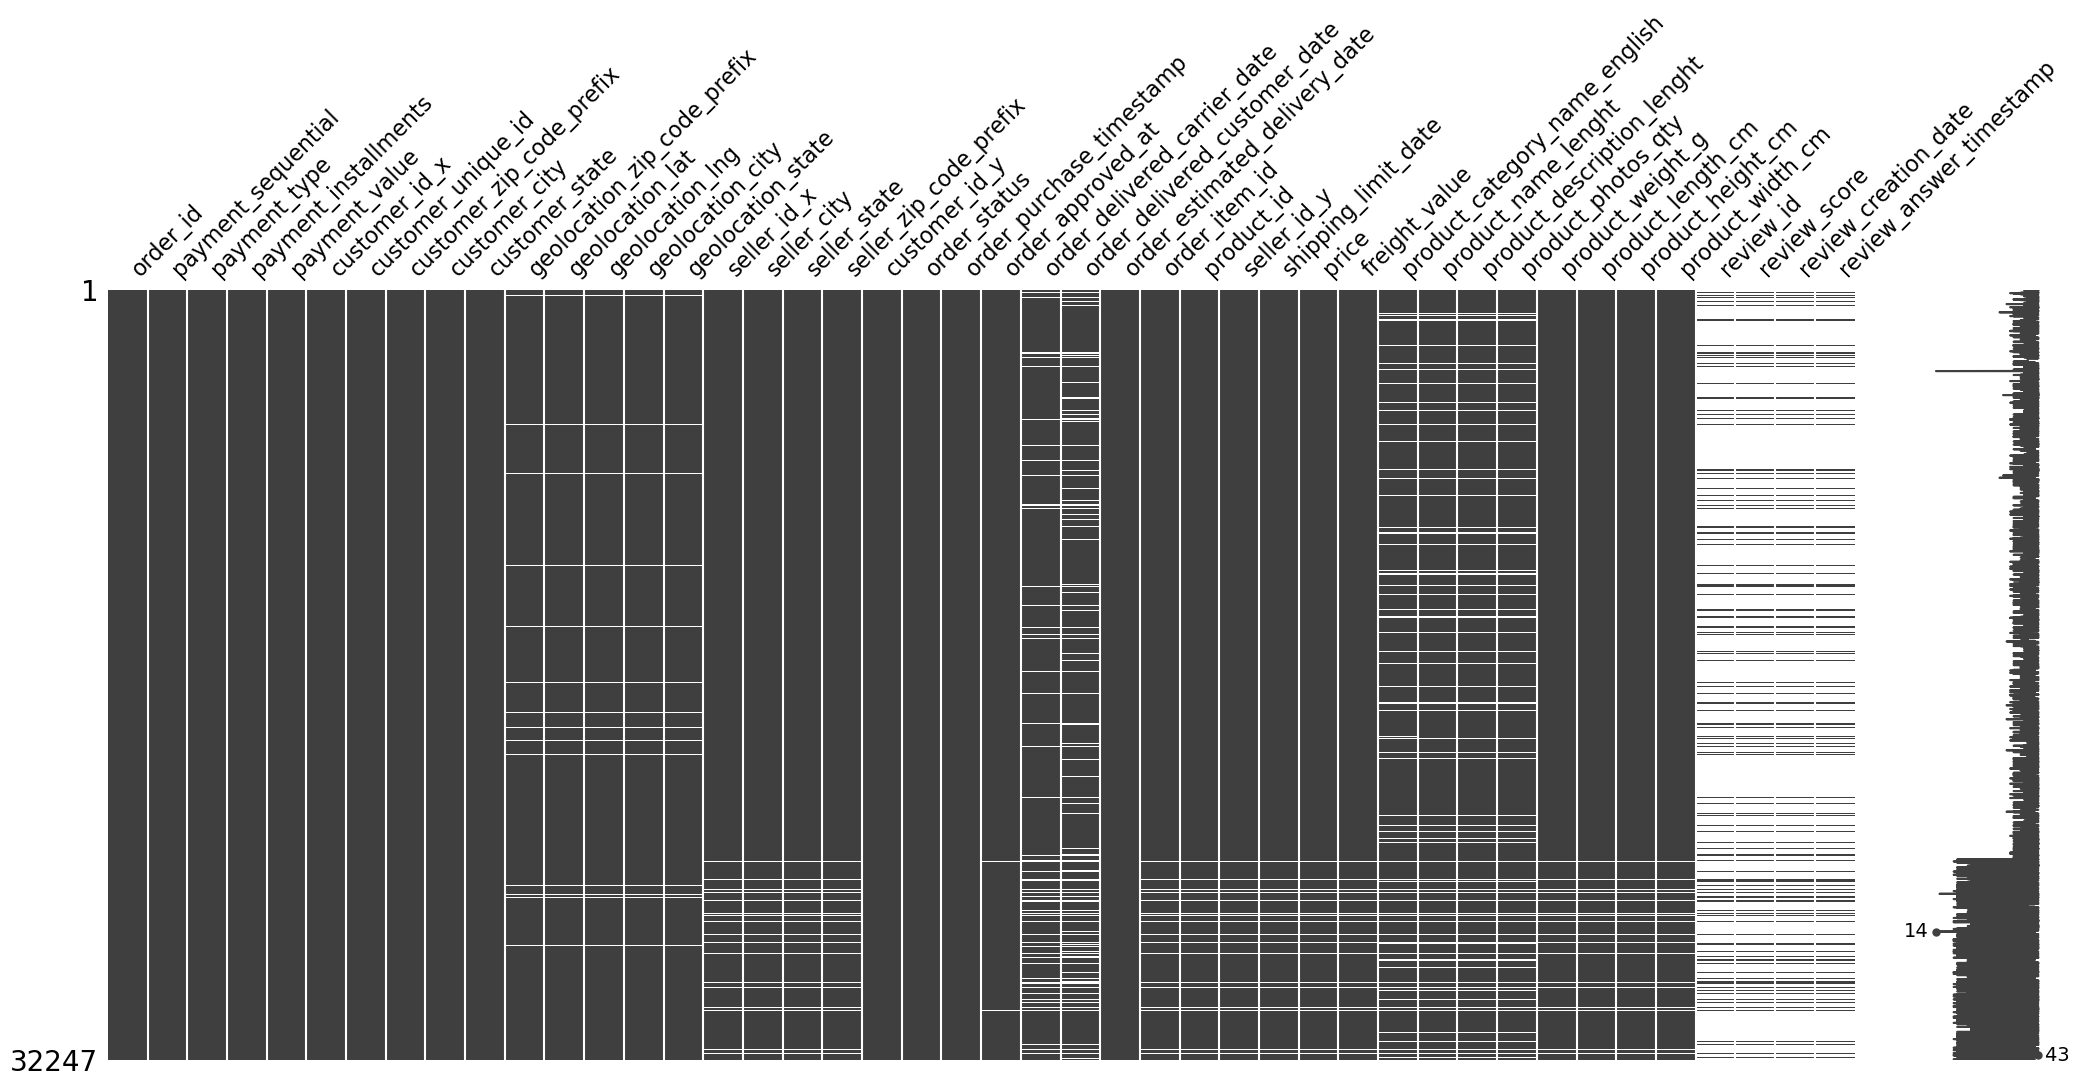

In [ ]:
import missingno as msno

# null 데이터가 들어있는 비중 시각화
# 결측치가 없으면 색으로, 결측치가 있으면 흰색으로 시각화

# null_rows_selector가 True로 표시된 행만 선택
filtered_rows = df_no_duplicates[null_rows_selector]

# df_null의 인덱스를 사용하여 필요한 컬럼만 선택
msno.matrix(filtered_rows)

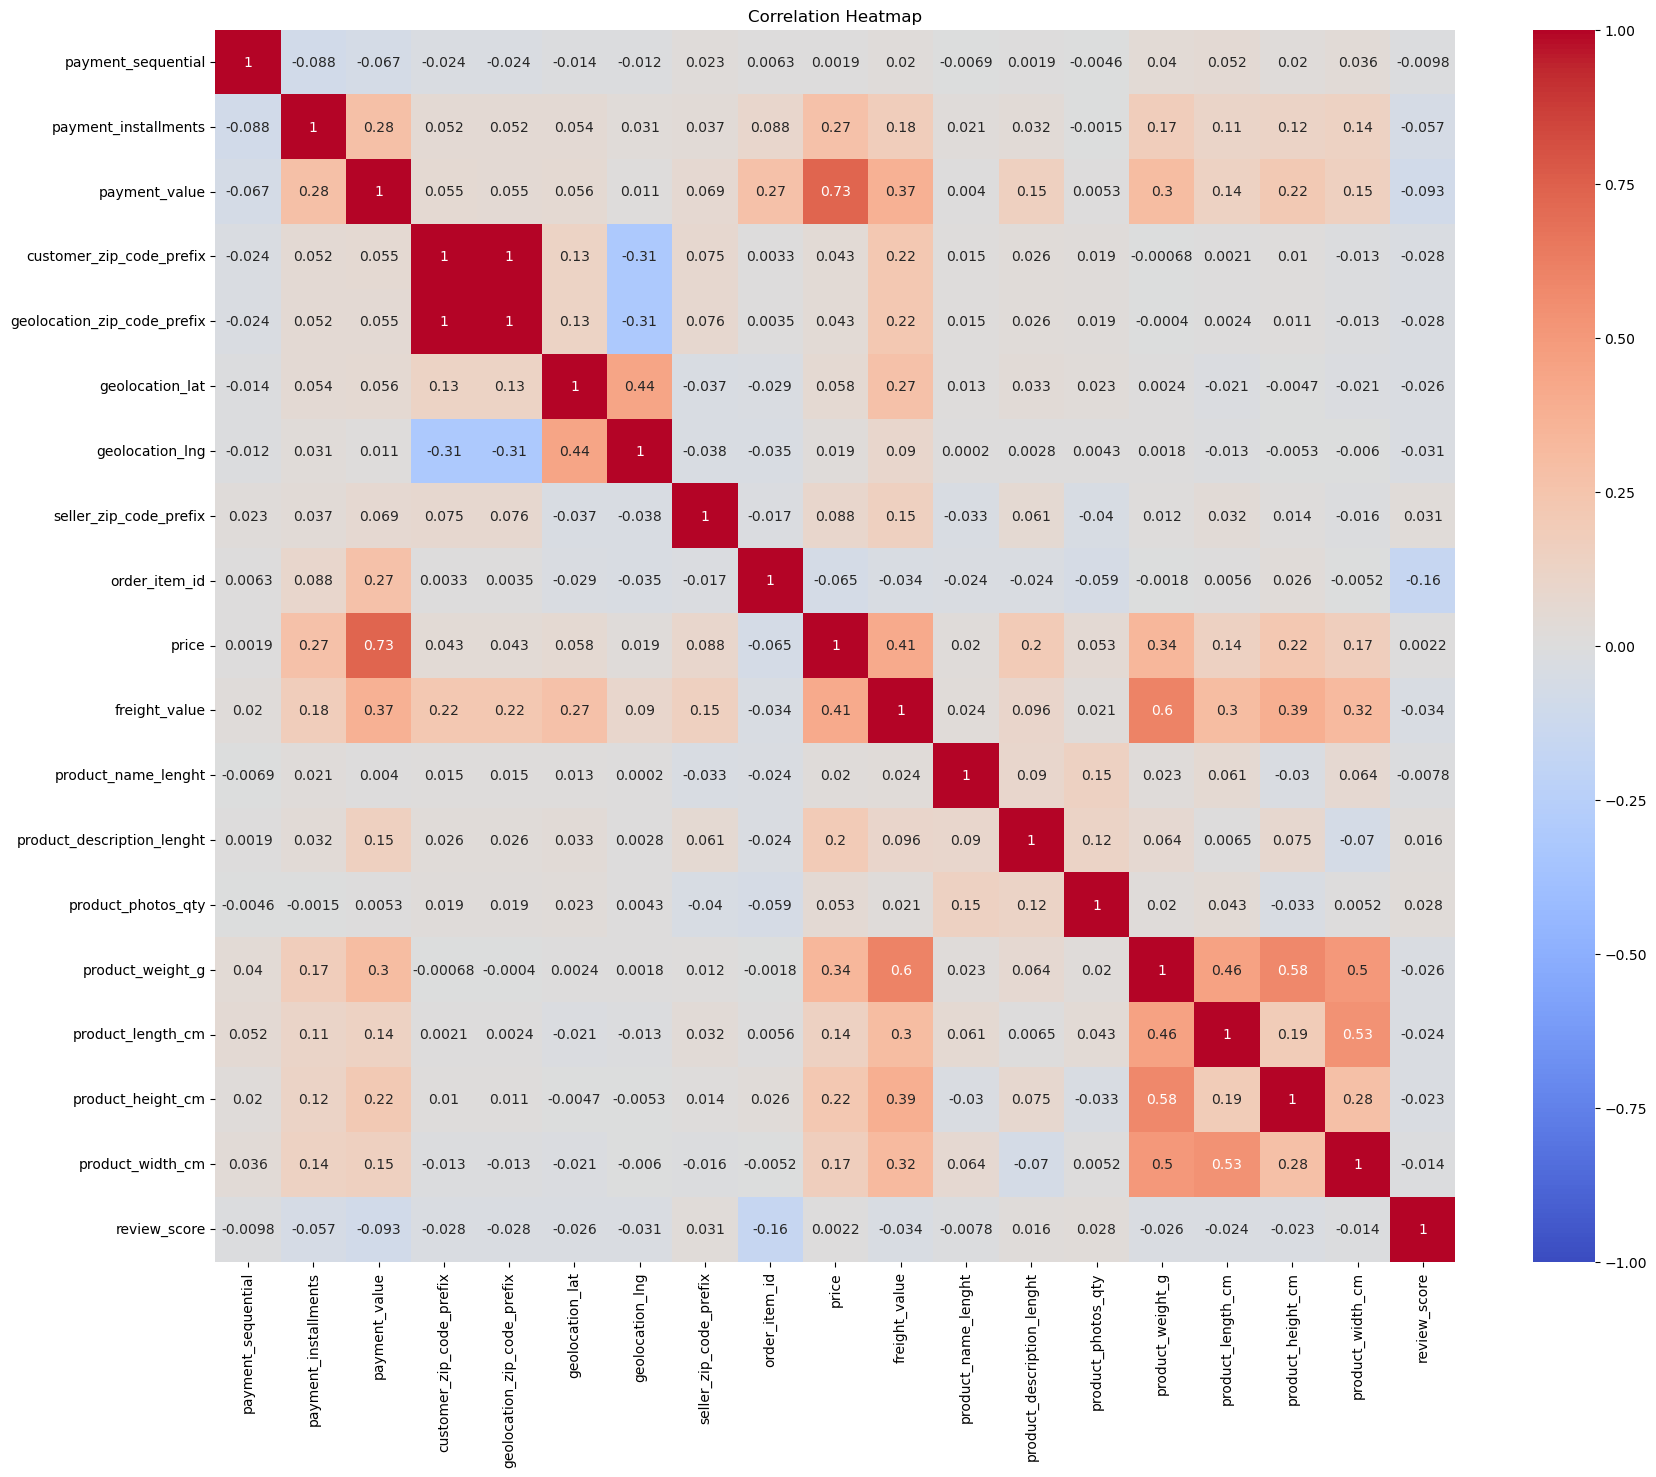

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr = df_no_duplicates.corr()

# Visualize using heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

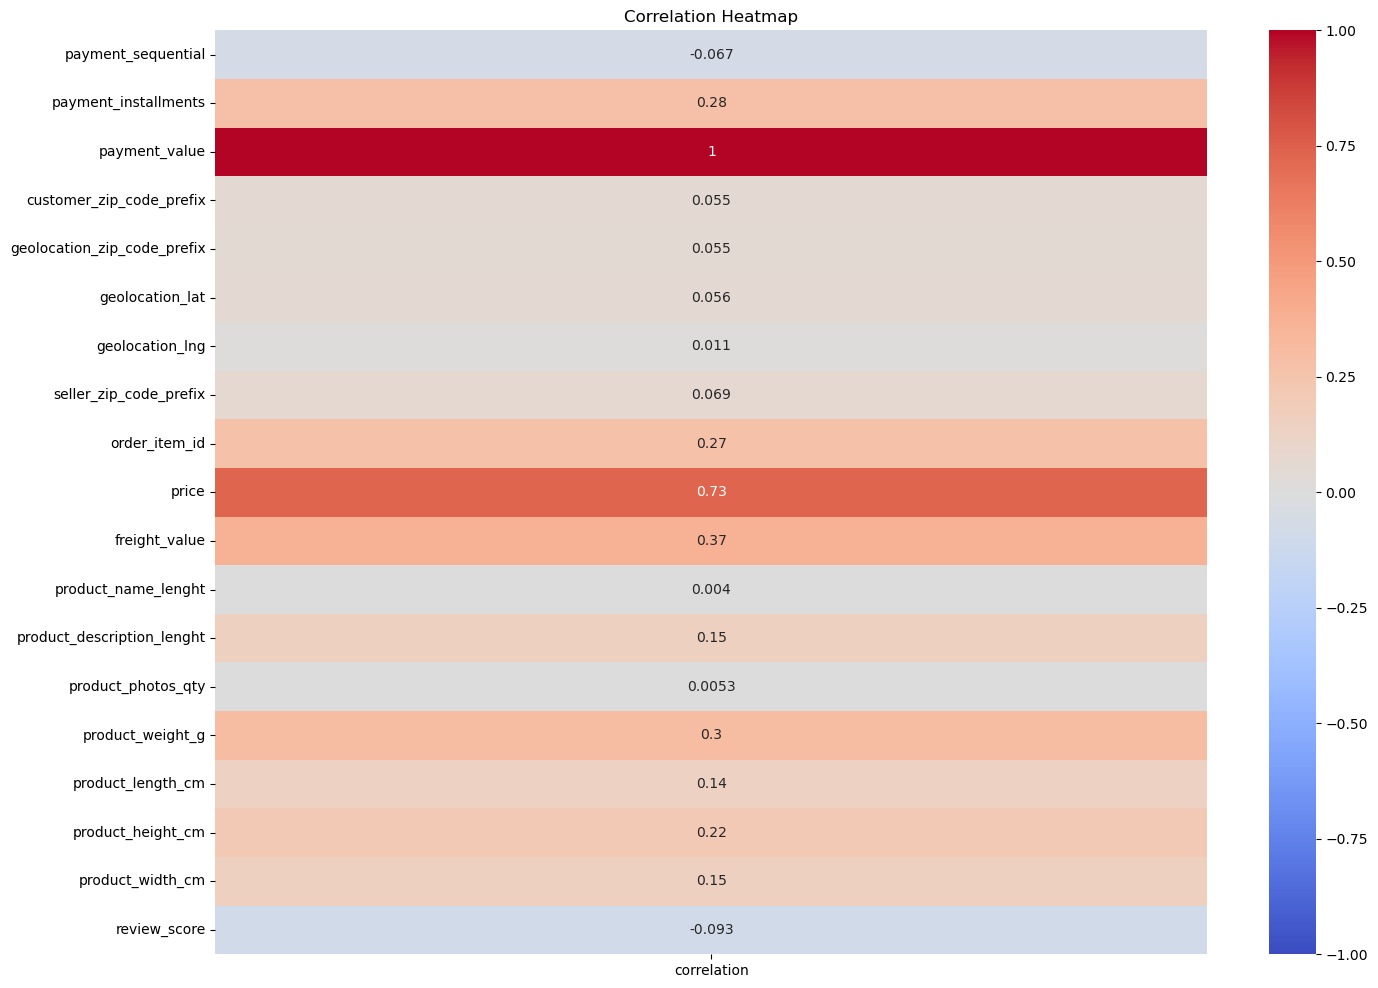

In [ ]:
# Calculate correlation
corr = df_no_duplicates.corrwith(df_no_duplicates['payment_value']).to_frame(name='correlation')

# Visualize using heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

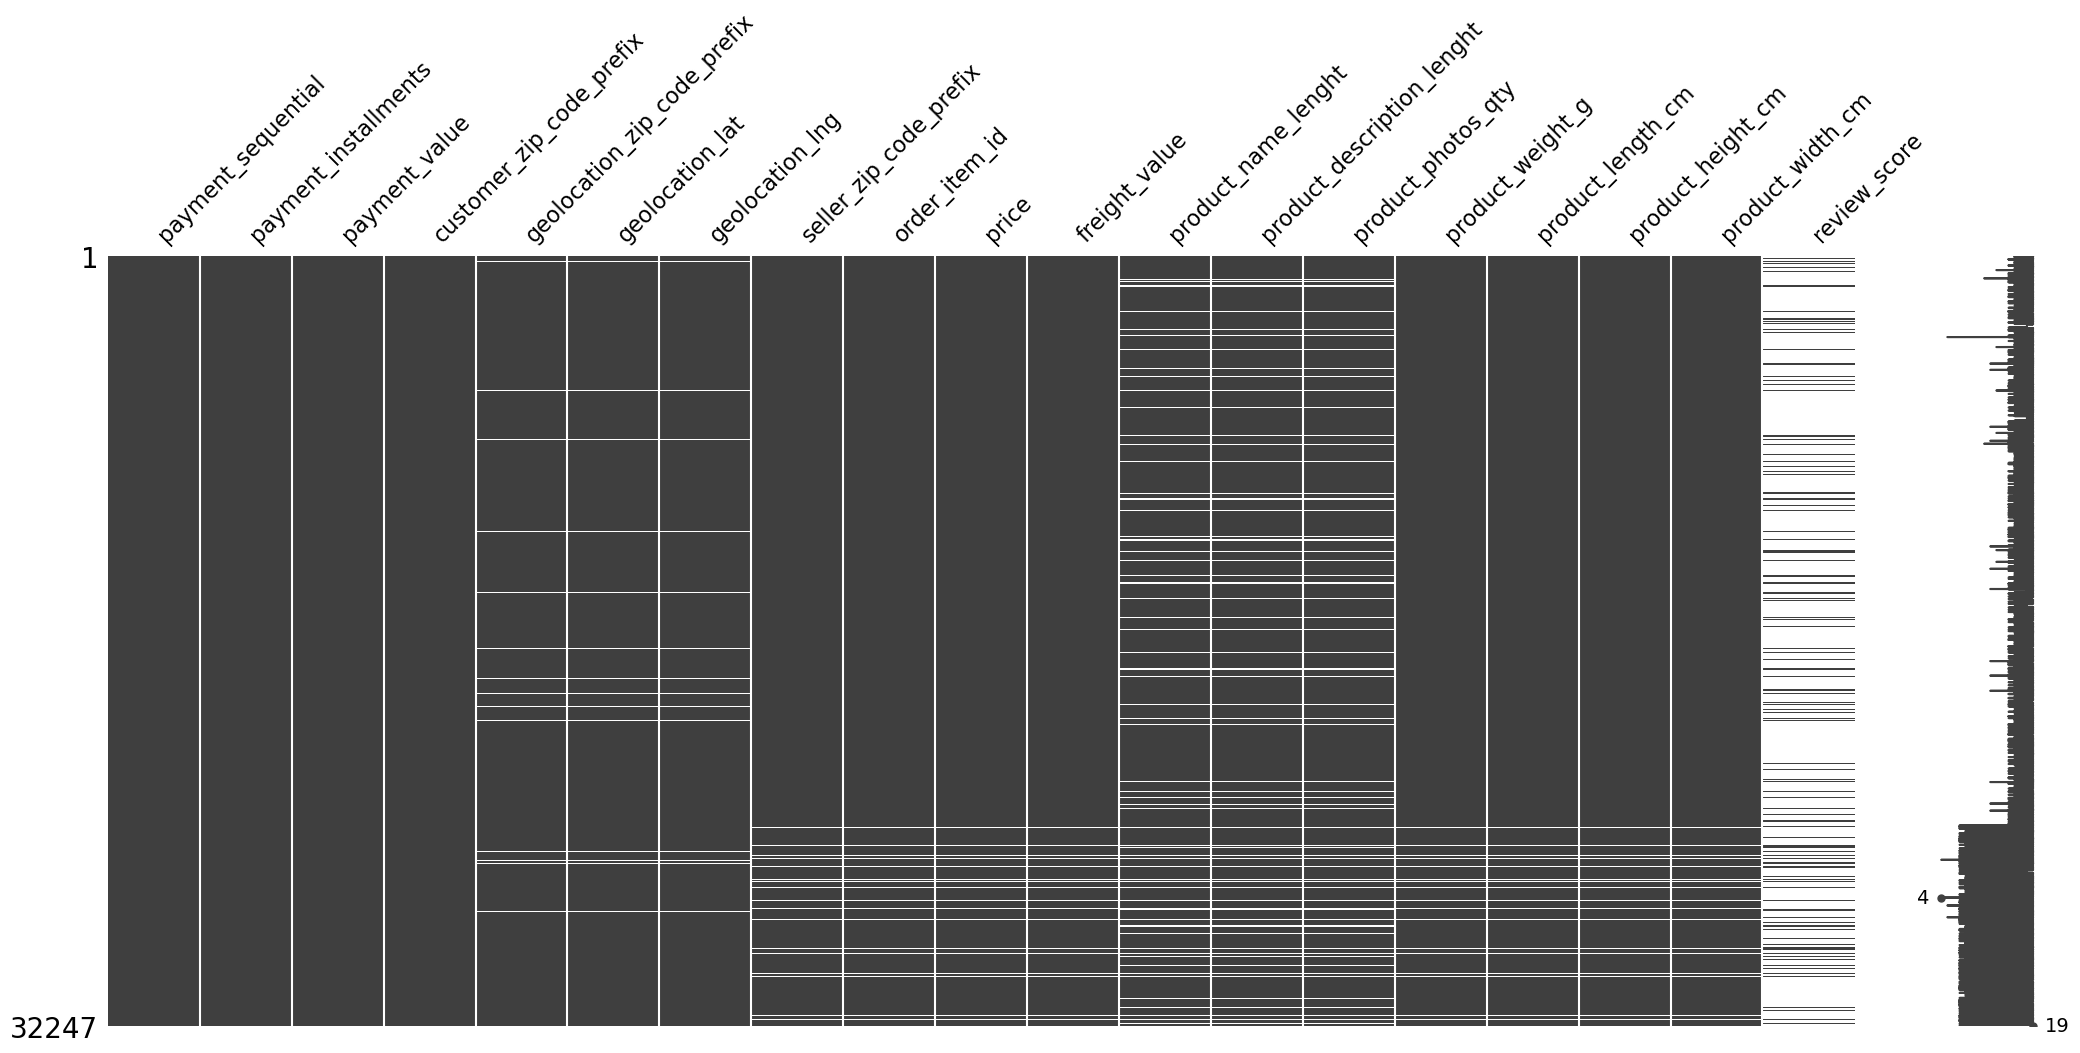

In [ ]:
# 상관 분석에서 상위 랭크에 포함된 컬럼들만 선별
df_regression = df_no_duplicates[['payment_sequential', 'payment_installments', 'payment_value', 'customer_zip_code_prefix',
                 'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'seller_zip_code_prefix',
                 'order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght',
                 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                 'review_score']]

# null_rows_selector가 True로 표시된 행만 선택
filtered_rows = df_regression[null_rows_selector]

# df_null의 인덱스를 사용하여 필요한 컬럼만 선택
msno.matrix(filtered_rows)

In [ ]:
# 결측치 처리: 회귀 문제에서는 평균, 중앙값 또는 보간법을 사용해 결측치를 처리할 수 있습니다.
# 여기에서는 수치형 특성의 결측치를 평균값으로 채우고, 범주형 특성의 결측치는 'Unknown'으로 채우겠습니다.
# 가격(price) 컬럼의 결측치는 특히 중요하므로 따로 처리하겠습니다.

numeric_features = df_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_regression.select_dtypes(include=['object']).columns

df_regression[numeric_features] = df_regression[numeric_features].fillna(df_regression[numeric_features].interpolate(method='linear'))
df_regression[categorical_features] = df_regression[categorical_features].fillna('Unknown')

# payment_value 컬럼의 결측치 처리: 여기에서는 중앙값으로 처리하겠습니다.
df_regression['payment_value'] = df_regression['payment_value'].fillna(df_regression['payment_value'].median())

In [ ]:
import statsmodels.api as sm

# 데이터 샘플링
sample_df = df_regression.sample(frac=0.2, random_state=42)
X = sample_df.drop('payment_value', axis=1)
y = sample_df['payment_value']

# 모델 적합
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2015.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:51:55   Log-Likelihood:            -1.6861e+05
No. Observations:               25427   AIC:                         3.373e+05
Df Residuals:                   25408   BIC:                         3.374e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -68.1177     16.044     -4.246      0.000     -99.565     -36.671
payment_sequential            -27.3138      1.693    -16.137      0.000     -30.631     -23.996
payment_installments            2.6682      0.433      6.162      0.000       1.820       3.517
customer_zip_code_prefix        0.0001      0.001      0.223      0.824      -0.001       0.001
geolocation_zip_code_prefix    -0.0001      0.001     -0.178      0.859      -0.001       0.001
geolocation_lat                 0.2698      0.251      1.077      0.282      -0.221       0.761
geolocation_lng                -0.1871      0.350     -0.535      0.593      -0.873       0.499
seller_zip_code_prefix       -3.82e-05   4.31e-05     -0.886      0.376      -0.000    4.63e-05
order_item_id                 126.8903      1.623     78.161      0.000     123.708     130.072
price                           1.0702      0.008    142.363      0.000       1.056       1.085
freight_value                   1.2095      0.103     11.686      0.000       1.007       1.412
product_name_lenght            -0.1157      0.117     -0.990      0.322      -0.345       0.113
product_description_lenght      0.0061      0.002      3.312      0.001       0.002       0.010
product_photos_qty             -2.4216      0.696     -3.479      0.001      -3.786      -1.057
product_weight_g                0.0003      0.000      0.705      0.481      -0.001       0.001
product_length_cm               0.1430      0.090      1.597      0.110      -0.033       0.319
product_height_cm               0.0934      0.108      0.861      0.389      -0.119       0.306
product_width_cm               -0.1626      0.127     -1.283      0.199      -0.411       0.086
review_score                   -9.8856      0.857    -11.531      0.000     -11.566      -8.205
==============================================================================
Omnibus:                    65594.868   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2896161235.090
Skew:                          29.231   Prob(JB):                         0.00
Kurtosis:                    1655.334   Cond. No.                     9.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* OLS (Ordinary Least Squares) : OLS는 선형 회귀 모델로서 여러 독립 변수들과 종속 변수 간의 관계를 선형적으로 모델링합니다. 시계열적인 성질 (계절성, 추세, 주기성 등)을 고려하지 않습니다. 추가적인 피처들 (예: 프로모션, 휴일, 경쟁사의 가격 변동 등)이 있고 그 피처들이 매출에 큰 영향을 미친다고 판단되면 OLS를 사용할 수 있습니다.
####
* ARIMA (AutoRegressive Integrated Moving Average) : ARIMA는 시계열 데이터에 대한 모델로, 자기 자신의 과거 값을 사용하여 미래 값을 예측합니다. 시계열의 추세, 계절성 등을 고려하여 예측합니다. 외부 피처들을 직접 포함시키기 어렵습니다 (하지만, SARIMAX와 같은 확장 모델을 사용하면 가능합니다). 매출액 데이터에 명확한 계절성, 추세가 있을 경우 ARIMA와 같은 시계열 모델이 적합할 수 있습니다.
####
* 결론적으로: 매출액 데이터에 시계열적 특성 (추세, 계절성, 주기성)이 강하게 나타나면 ARIMA나 그 변형 (예: SARIMAX)을 사용하는 것이 좋습니다. 여러 추가적인 피처들이 있고, 그 피처들이 매출에 큰 영향을 미친다고 판단될 때, 또는 데이터에 시계열적 특성이 뚜렷하지 않다면 OLS나 다른 회귀 모델을 사용하는 것도 고려해볼 수 있습니다. 사용하는 모델이 중요한 것도 있지만, 데이터의 특성을 정확히 파악하고 전처리하는 과정도 매우 중요합니다. 가능하다면 여러 모델을 시도해보고 검증하여 가장 적합한 모델을 선택하는 것이 좋습니다.

In [ ]:
# 매출액의 추세를 예측해야하므로 선형 회귀방식이 적용되어야 한다.
# 분류 문제가 아니다.

import statsmodels.api as sm

def linear_regression_test(X, y, alpha=0.05):
    regression_list = []
    results_list = []
    target = y.name

    for index, col in X.select_dtypes(exclude=['object']).columns.to_series().items():
        X_col = sm.add_constant(X[col].dropna())  # add a constant for the intercept(절편)
        y_matched = y.loc[X_col.index]

        model = sm.OLS(y_matched, X_col)
        result = model.fit()

        coef_pvalue = result.pvalues[col]
        results_list.append([target, col, result.params[col], coef_pvalue,
                             'Significant' if coef_pvalue <= alpha else 'Not significant',
                             'include' if coef_pvalue <= alpha else 'drop'])
        if coef_pvalue <= alpha:
            regression_list.append(col)
    results_df = pd.DataFrame(results_list, columns=['dependent', 'independent', 'coefficient', 'p-value', 'result', 'recommendation'])
    return results_df, regression_list

results_df, regression_list = linear_regression_test(X, df_regression['payment_value'])
results_df

,dependent,independent,coefficient,p-value,result,recommendation
0,payment_value,const,177.192509,0.000000e+00,Significant,include
1,payment_value,payment_sequential,-25.342255,2.912197e-22,Significant,include
2,payment_value,payment_installments,25.824049,0.000000e+00,Significant,include
3,payment_value,customer_zip_code_prefix,0.000574,9.342610e-22,Significant,include
4,payment_value,geolocation_zip_code_prefix,0.000574,9.744457e-22,Significant,include
5,payment_value,geolocation_lat,2.751827,1.307543e-17,Significant,include
6,payment_value,geolocation_lng,0.510266,2.510324e-01,Not significant,drop
7,payment_value,seller_zip_code_prefix,0.000710,1.105658e-27,Significant,include
8,payment_value,order_item_id,114.047606,0.000000e+00,Significant,include
9,payment_value,price,1.102618,0.000000e+00,Significant,include


In [ ]:
regression_list.remove('const')
regression_list.append('payment_value')
regression_list

['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'geolocation_zip_code_prefix',
 'geolocation_lat',
 'seller_zip_code_prefix',
 'order_item_id',
 'price',
 'freight_value',
 'product_description_lenght',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'review_score',
 'payment_value']

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.arima.model import ARIMA

def time_series_forecasting(df):
    # 1. 시간 특성 엔지니어링
    df['year'] = df['order_purchase_timestamp'].dt.year
    df['month'] = df['order_purchase_timestamp'].dt.month
    df['day'] = df['order_purchase_timestamp'].dt.day
    df['weekday'] = df['order_purchase_timestamp'].dt.weekday

    # 2. 지연 (lag) 특성 생성
    df['payment_value_lag1'] = df['payment_value'].shift(1)

    # 결측값 제거
    df.dropna(inplace=True)

    # 문자열 데이터를 포함하는 컬럼을 찾아 원-핫 인코딩
    object_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=object_cols, drop_first=True)

    # 3. 시간 기반 데이터 분할
    cutoff_date = '2018-05-30'
    train = df[df['order_purchase_timestamp'] <= cutoff_date]
    test = df[df['order_purchase_timestamp'] > cutoff_date]

    X_train = train.drop(['payment_value', 'order_purchase_timestamp'], axis=1)
    y_train = train['payment_value']

    X_test = test.drop(['payment_value', 'order_purchase_timestamp'], axis=1)
    y_test = test['payment_value']

    # 4.모델 학습 및 하이퍼파라미터 최적화
    model_lgbm = LGBMRegressor(n_estimators=64, random_state=42)
    model_xgb = XGBRegressor(n_estimators=106, random_state=42)
    model_cat = CatBoostRegressor(n_estimators=90, random_state=42, verbose=0)  # verbose=0은 학습 과정의 출력을 숨깁니다.
    model_arima = ARIMA(y_train, order=(1,1,1))

    model_lgbm.fit(X_train, y_train)
    model_xgb.fit(X_train, y_train)
    model_cat.fit(X_train, y_train)

    predictions_lgbm = model_lgbm.predict(X_test)
    predictions_xgb = model_xgb.predict(X_test)
    predictions_cat = model_cat.predict(X_test)
    predictions_arima = model_arima.fit().forecast(steps=len(X_test))

    # 5. 성능 평가
    mae_lgbm = mean_absolute_error(y_test, predictions_lgbm)
    mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
    rmse_lgbm = np.sqrt(mse_lgbm)
    r2_lgbm = r2_score(y_test, predictions_lgbm)

    mae_xgb = mean_absolute_error(y_test, predictions_xgb)
    mse_xgb = mean_squared_error(y_test, predictions_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, predictions_xgb)

    mae_cat = mean_absolute_error(y_test, predictions_cat)
    mse_cat = mean_squared_error(y_test, predictions_cat)
    rmse_cat = np.sqrt(mse_cat)
    r2_cat = r2_score(y_test, predictions_cat)

    mae_arima = mean_absolute_error(y_test, predictions_arima)
    mse_arima = mean_squared_error(y_test, predictions_arima)
    rmse_arima = np.sqrt(mse_arima)
    r2_arima = r2_score(y_test, predictions_arima)

    metrics = pd.DataFrame({
        "Metric": ['MAE', 'MSE', 'RMSE', 'R2'],
        "LightGBM": [mae_lgbm, mse_lgbm, rmse_lgbm, r2_lgbm],
        "XGBoost": [mae_xgb, mse_xgb, rmse_xgb, r2_xgb],
        "CatBoost": [mae_cat, mse_cat, rmse_cat, r2_cat],
        "ARIMA": [mae_arima, mse_arima, rmse_arima, r2_arima]
    })

    # 가장 좋은 모델 선택 (RMSE를 기준으로)
    best_rmse = min(rmse_lgbm, rmse_xgb, rmse_cat, rmse_arima)

    if best_rmse == rmse_lgbm:
        best_model = model_lgbm
    elif best_rmse == rmse_xgb:
        best_model = model_xgb
    elif best_rmse == rmse_arima:
        best_model = model_xgb
    else:
        best_model = model_cat

    return metrics, model_lgbm, model_xgb, model_cat, model_arima, best_model

df_test = df_regression[regression_list]
df_test['order_purchase_timestamp'] = df_no_duplicates['order_purchase_timestamp']
df_test['order_purchase_timestamp'] = pd.to_datetime(df_test['order_purchase_timestamp'])
results, light_gbm, xgboost, catboost, arima, best_model = time_series_forecasting(df_test)

results

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Metric,LightGBM,XGBoost,CatBoost,ARIMA
0,MAE,33.228301,32.336192,36.660864,129.967154
1,MSE,10657.875065,9276.382637,12342.459637,72728.036533
2,RMSE,103.236985,96.313979,111.096623,269.681361
3,R2,0.853442,0.872439,0.830277,-0.000095


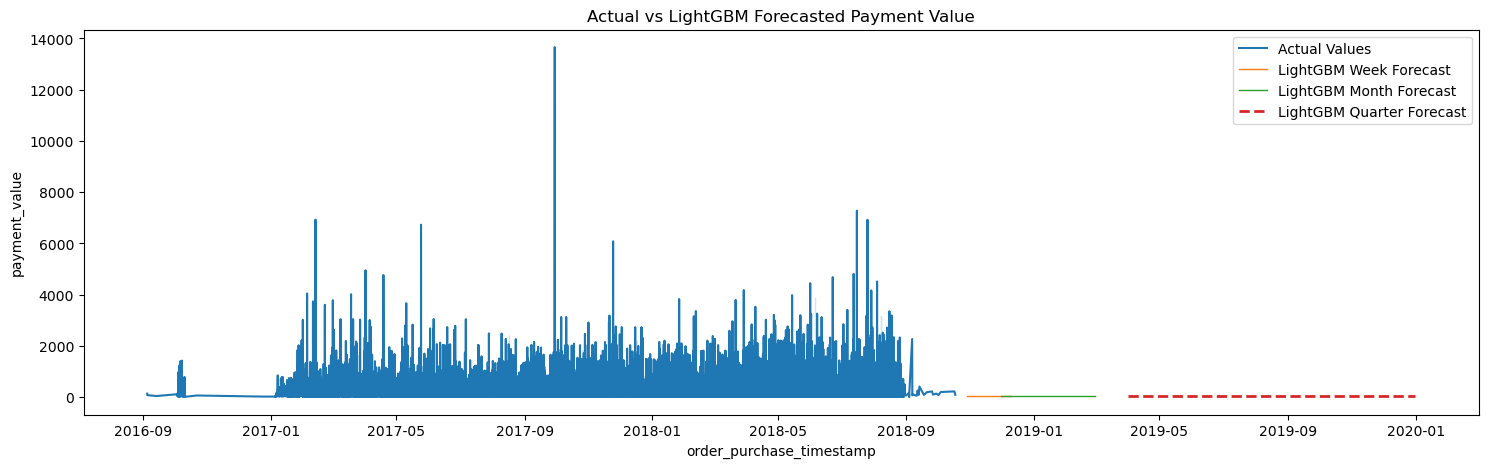

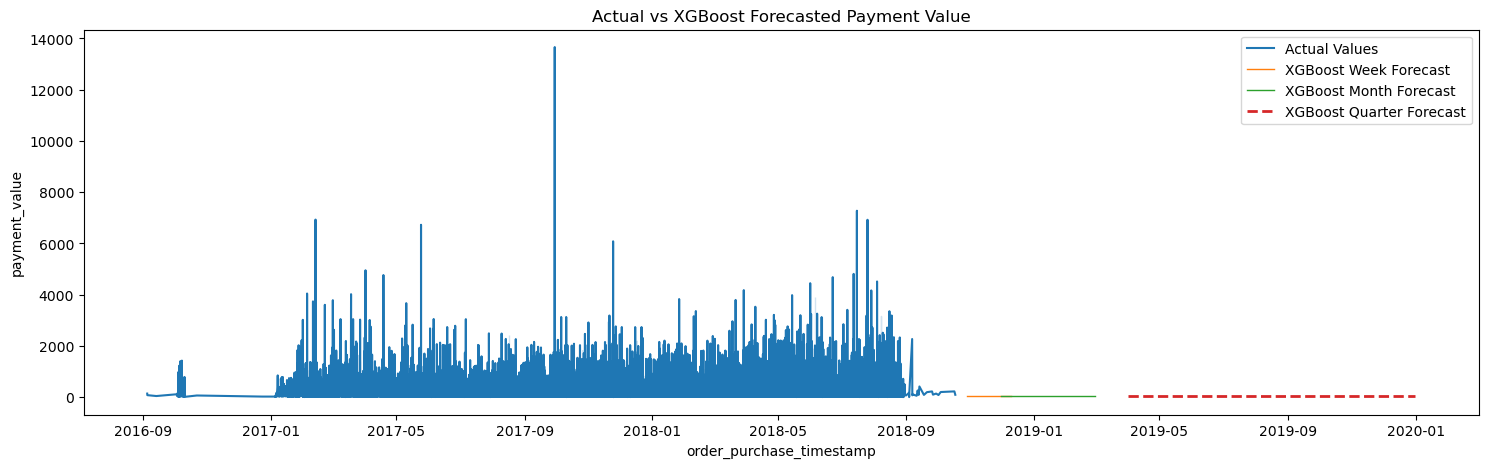

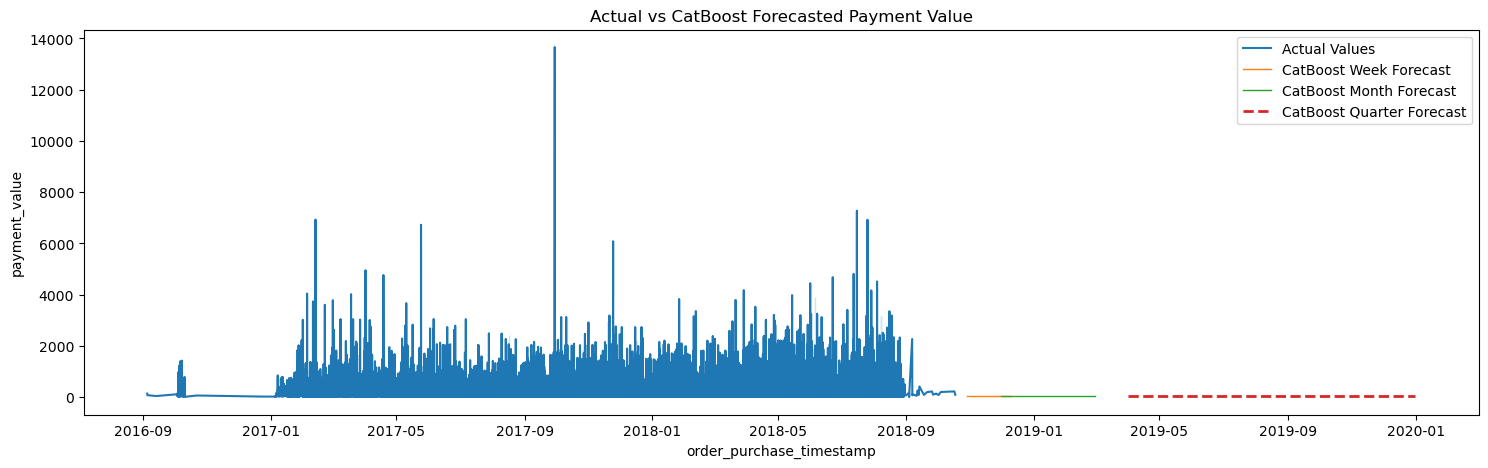

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


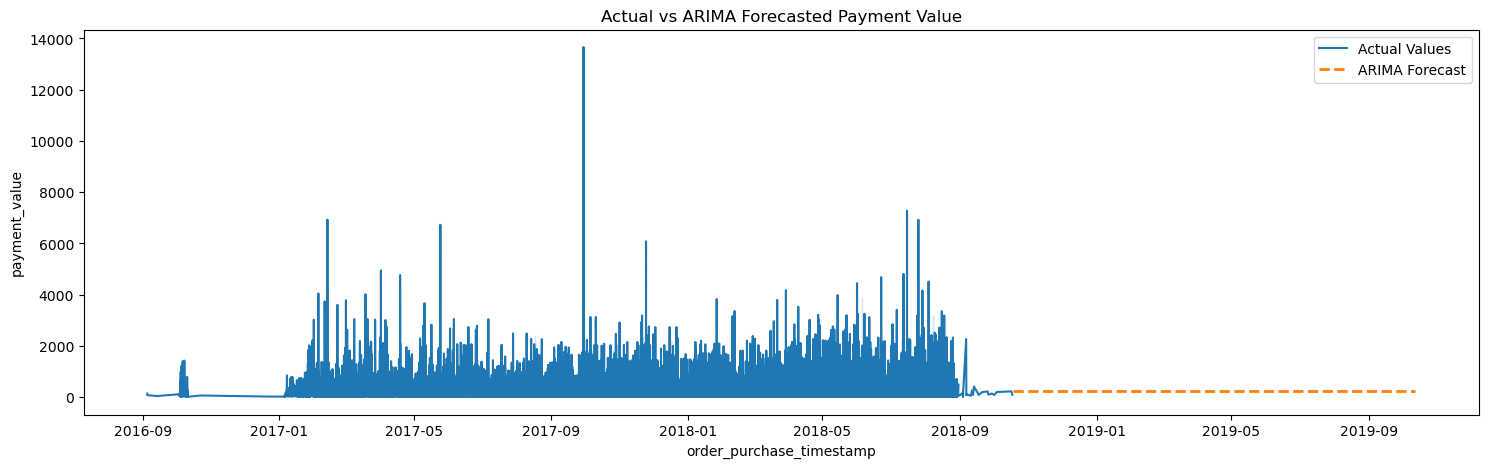

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_numeric(data):
    columns_to_convert = [
        "payment_sequential", "payment_installments", "customer_zip_code_prefix",
        "geolocation_zip_code_prefix", "geolocation_lat", "seller_zip_code_prefix",
        "order_item_id", "price", "freight_value", "product_description_lenght",
        "product_weight_g", "product_length_cm", "product_height_cm",
        "product_width_cm", "review_score", "year", "month", "day",
        "weekday", "payment_value_lag1"
    ]

    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    return data

def add_missing_features(data, model_features):
    for feature in model_features:
        if feature not in data.columns:
            data[feature] = 0
    return data

def get_feature_names(model):
    if isinstance(model, (CatBoostRegressor)):
        return model.feature_names_
    elif isinstance(model, (LGBMRegressor)):
        return model.feature_name_
    elif isinstance(model, (XGBRegressor)):
        return model.get_booster().feature_names
    elif isinstance(model, (ARIMA)):
        return ['order_purchase_timestamp'] # this could just be a placeholder
    else:
        raise ValueError("Model type not supported")


def forecast_period(df, model, period, n_periods):
    if isinstance(model, ARIMA):
        # Forecast directly using ARIMA
        series_data = df.sort_values(by='order_purchase_timestamp', ascending=True)['payment_value']

        # Check if the model is already fitted
        try:
            fitted_model = model.fittedvalues
        except:
            fitted_model = model.fit()

        # Forecast using the fitted model
#         forecasted_values, _, _ = fitted_model.forecast(steps=n_periods)
        forecasted_values = fitted_model.forecast(steps=n_periods).iloc[0]

        last_timestamp = df.sort_values(by='order_purchase_timestamp', ascending=True)['order_purchase_timestamp'].iloc[-1]
        forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(days=1), periods=n_periods)

        forecast_df = pd.DataFrame({
            'order_purchase_timestamp': forecast_dates,
            'forecasted_payment_value': forecasted_values
        })

        return forecast_df
    else:
        feature_names = get_feature_names(model)

        last_data = df.sort_values(by='order_purchase_timestamp', ascending=True).iloc[-1:].copy()
        last_data = add_missing_features(last_data, feature_names)
        last_data = last_data.iloc[0]

        forecasted_values = []

        timedelta_args = {}
        if period == 'day':
            timedelta_args['days'] = 1
        elif period == 'week':
            timedelta_args['weeks'] = 1
        elif period == 'month':
            timedelta_args['days'] = 30
        elif period == 'quarter':
            timedelta_args['days'] = 90

        for _ in range(n_periods):
            # 날짜 업데이트
            last_timestamp = df.sort_values(by='order_purchase_timestamp', ascending=True)['order_purchase_timestamp'].iloc[-1]

            if _ == 0:  # 첫 번째 loop일 경우
                last_data['order_purchase_timestamp'] = last_timestamp + pd.DateOffset(days=1)
            else:
                last_data['order_purchase_timestamp'] += pd.Timedelta(**timedelta_args)

            last_data = convert_to_numeric(last_data)  # Ensure the series is converted to numeric directly
            X = last_data[feature_names].to_frame().T

            if 'order_purchase_timestamp' in X.columns:
                X = X.drop(columns=['order_purchase_timestamp'])

            X = convert_to_numeric(X)

            forecasted_value = model.predict(X)[0]
            forecasted_values.append(forecasted_value)

            last_data['payment_value'] = forecasted_value

        last_timestamp = df.sort_values(by='order_purchase_timestamp', ascending=True)['order_purchase_timestamp'].iloc[-1]

        if period == 'day':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(days=1), periods=n_periods)
        elif period == 'week':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(weeks=1), periods=n_periods, freq='W')
        elif period == 'month':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(weeks=4), periods=n_periods, freq='M')
        elif period == 'quarter':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(weeks=12), periods=n_periods, freq='Q')

        forecast_df = pd.DataFrame({
            'order_purchase_timestamp': forecast_dates,
            'forecasted_payment_value': forecasted_values
        })

    return forecast_df

# 예측하기
# forecasted_week = forecast_period(df_test, xgboost, period='week', n_periods=7)
# forecasted_month = forecast_period(df_test, xgboost, period='month', n_periods=4)
# forecasted_quarter = forecast_period(df_test, xgboost, period='quarter', n_periods=4)

def visualize_forecasts(df, models):

    periods = ['week', 'month', 'quarter']

    for model_name, model in models.items():
        plt.figure(figsize=(18, 5))

        # 실제 값 표시
        sns.lineplot(data=df, x='order_purchase_timestamp', y='payment_value', label='Actual Values')

        if isinstance(model, ARIMA):  # ARIMA 모델의 경우 따로 처리
            forecasted = forecast_period(df, model, period='day', n_periods=360)  # 예를 들어 90일 동안의 예측
            sns.lineplot(data=forecasted, x='order_purchase_timestamp', y='forecasted_payment_value',
                         label=f'{model_name} Forecast', linewidth=2, linestyle='--')
        else:
            for period in periods:
                forecasted = forecast_period(df, model, period=period, n_periods=7 if period == 'week' else 4)
                sns.lineplot(data=forecasted, x='order_purchase_timestamp', y='forecasted_payment_value',
                             label=f'{model_name} {period.capitalize()} Forecast', linewidth=1 if period != 'quarter' else 2,
                             linestyle='--' if period == 'quarter' else '-')

        plt.title('Actual vs ' + model_name + ' Forecasted Payment Value')
        plt.legend()
        plt.show()


# 각 모델에 대한 예측 시각화
models = {
    "LightGBM": light_gbm,
    "XGBoost": xgboost,
    "CatBoost": catboost,
    "ARIMA": arima
}

visualize_forecasts(df_test, models)

<Axes: >

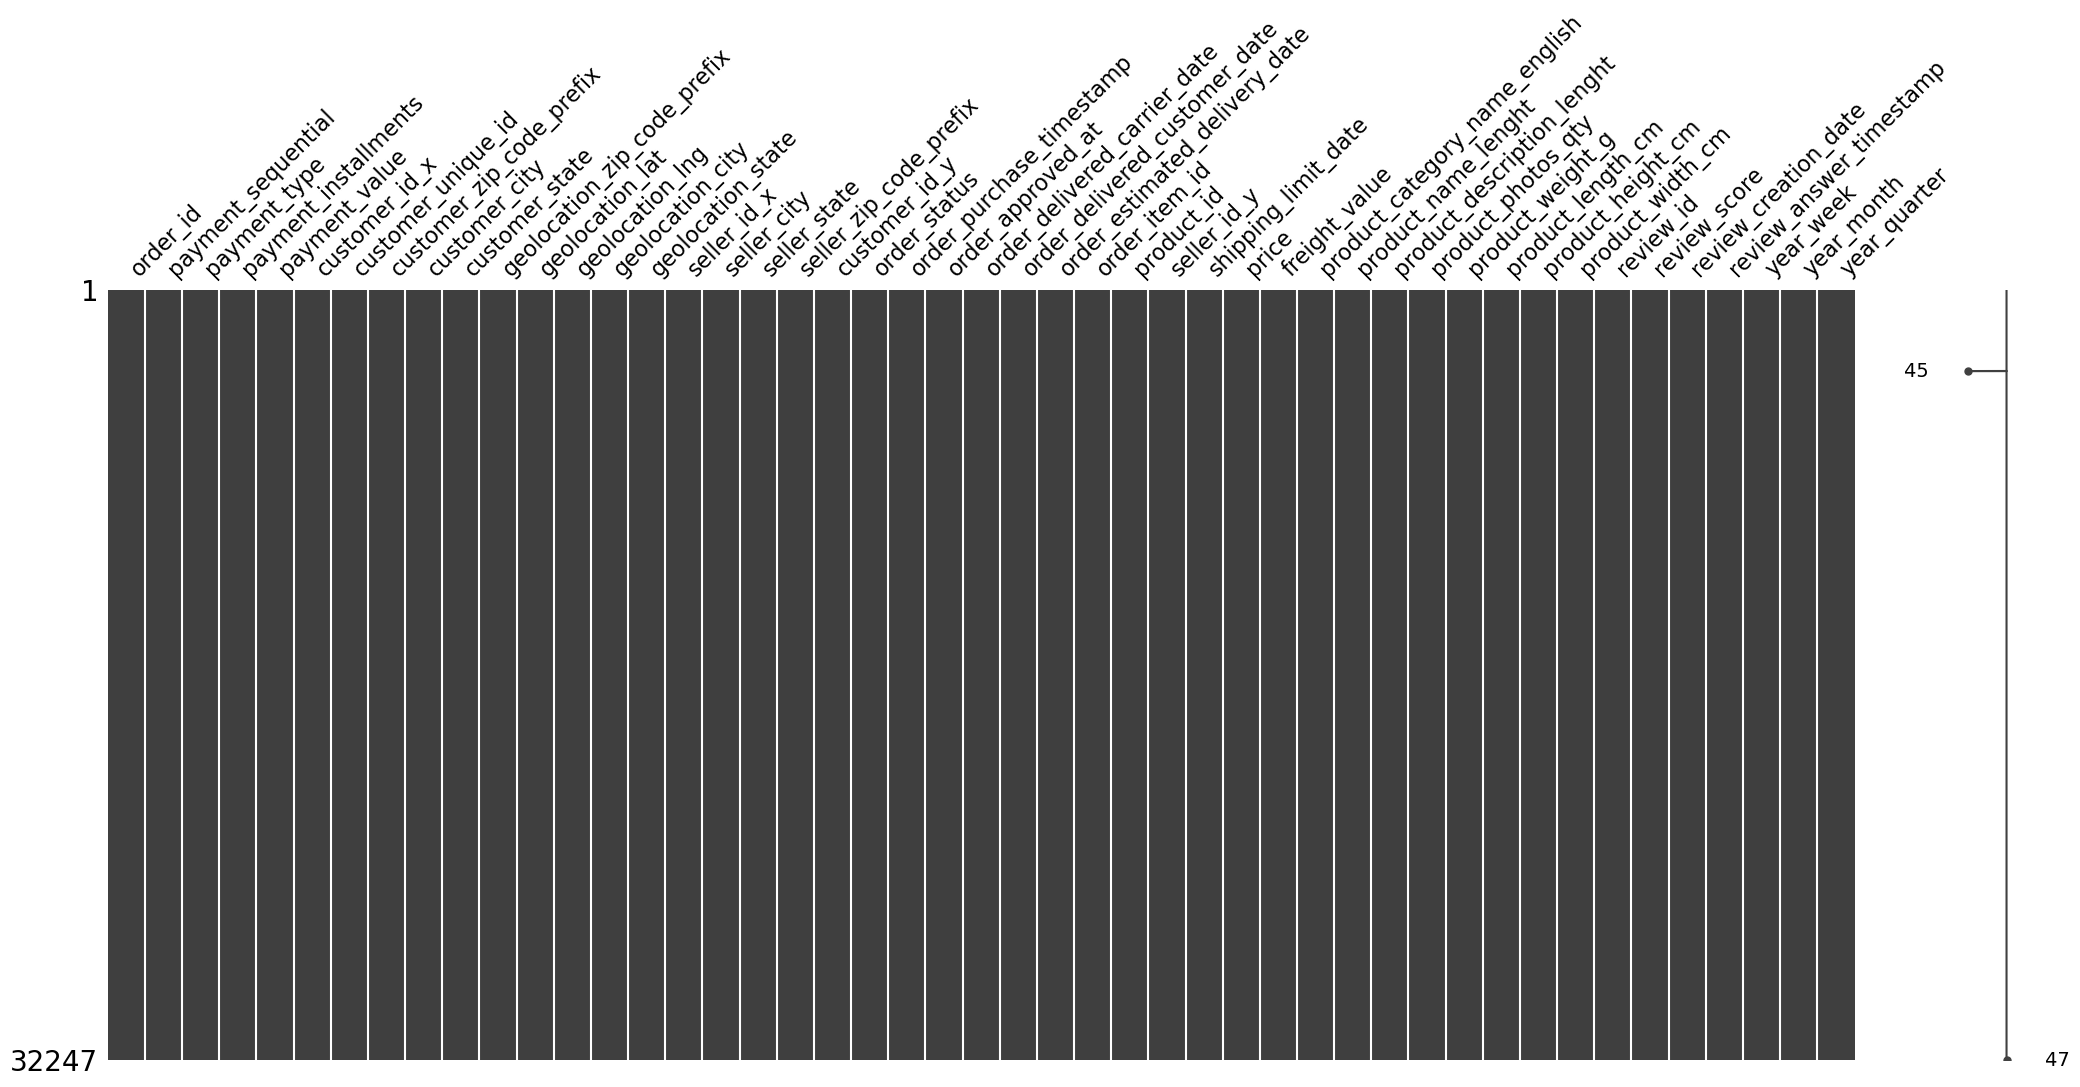

In [ ]:
numeric_features = df_no_duplicates.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_no_duplicates.select_dtypes(include=['object']).columns

df_no_duplicates[numeric_features] = df_no_duplicates[numeric_features].fillna(df_no_duplicates[numeric_features].interpolate(method='linear'))
df_no_duplicates[categorical_features] = df_no_duplicates[categorical_features].fillna('Unknown')

# payment_value 컬럼의 결측치 처리: 여기에서는 중앙값으로 처리하겠습니다.
df_no_duplicates['payment_value'] = df_no_duplicates['payment_value'].fillna(df_no_duplicates['payment_value'].median())

# null_rows_selector가 True로 표시된 행만 선택
filtered_rows = df_no_duplicates[null_rows_selector]

# df_null의 인덱스를 사용하여 필요한 컬럼만 선택
msno.matrix(filtered_rows)

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.arima.model import ARIMA

from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    return df

def time_series_forecasting(df):
    # 1. 시간 특성 엔지니어링
    df['year'] = df['order_purchase_timestamp'].dt.year
    df['month'] = df['order_purchase_timestamp'].dt.month
    df['day'] = df['order_purchase_timestamp'].dt.day
    df['weekday'] = df['order_purchase_timestamp'].dt.weekday

    # 2. 지연 (lag) 특성 생성
    df['payment_value_lag1'] = df['payment_value'].shift(1)

    # 결측값 제거
    df.dropna(inplace=True)

    # 문자열 데이터를 포함하는 컬럼을 찾아 원-핫 인코딩
    object_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=object_cols, drop_first=True)

    # 3. 시간 기반 데이터 분할
    cutoff_date = '2018-05-30'
    train = df[df['order_purchase_timestamp'] <= cutoff_date]
    test = df[df['order_purchase_timestamp'] > cutoff_date]

    X_train = train.drop(['payment_value', 'order_purchase_timestamp'], axis=1)
    y_train = train['payment_value']

    X_test = test.drop(['payment_value', 'order_purchase_timestamp'], axis=1)
    y_test = test['payment_value']

    # 4.모델 학습 및 하이퍼파라미터 최적화
#     model_lgbm = LGBMRegressor(n_estimators=64, random_state=42)
#     model_xgb = XGBRegressor(n_estimators=106, random_state=42)
#     model_cat = CatBoostRegressor(n_estimators=90, random_state=42, verbose=0)  # verbose=0은 학습 과정의 출력을 숨깁니다.
    model_arima = ARIMA(y_train, order=(1,1,1))

#     model_lgbm.fit(X_train, y_train)
#     model_xgb.fit(X_train, y_train)
#     model_cat.fit(X_train, y_train)

#     predictions_lgbm = model_lgbm.predict(X_test)
#     predictions_xgb = model_xgb.predict(X_test)
#     predictions_cat = model_cat.predict(X_test)
    predictions_arima = model_arima.fit().forecast(steps=len(X_test))

    # 5. 성능 평가
#     mae_lgbm = mean_absolute_error(y_test, predictions_lgbm)
#     mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
#     rmse_lgbm = np.sqrt(mse_lgbm)
#     r2_lgbm = r2_score(y_test, predictions_lgbm)

#     mae_xgb = mean_absolute_error(y_test, predictions_xgb)
#     mse_xgb = mean_squared_error(y_test, predictions_xgb)
#     rmse_xgb = np.sqrt(mse_xgb)
#     r2_xgb = r2_score(y_test, predictions_xgb)

#     mae_cat = mean_absolute_error(y_test, predictions_cat)
#     mse_cat = mean_squared_error(y_test, predictions_cat)
#     rmse_cat = np.sqrt(mse_cat)
#     r2_cat = r2_score(y_test, predictions_cat)

    mae_arima = mean_absolute_error(y_test, predictions_arima)
    mse_arima = mean_squared_error(y_test, predictions_arima)
    rmse_arima = np.sqrt(mse_arima)
    r2_arima = r2_score(y_test, predictions_arima)

    metrics = pd.DataFrame({
#         "Metric": ['MAE', 'MSE', 'RMSE', 'R2'],
#         "LightGBM": [mae_lgbm, mse_lgbm, rmse_lgbm, r2_lgbm],
#         "XGBoost": [mae_xgb, mse_xgb, rmse_xgb, r2_xgb],
#         "CatBoost": [mae_cat, mse_cat, rmse_cat, r2_cat],
        "ARIMA": [mae_arima, mse_arima, rmse_arima, r2_arima]
    })

    # 가장 좋은 모델 선택 (RMSE를 기준으로)
#     best_rmse = min(rmse_lgbm, rmse_xgb, rmse_cat, rmse_arima)

#     if best_rmse == rmse_lgbm:
#         best_model = model_lgbm
#     elif best_rmse == rmse_xgb:
#         best_model = model_xgb
#     elif best_rmse == rmse_arima:
#         best_model = model_xgb
#     else:
#         best_model = model_cat

    return metrics, model_arima

df_no_duplicates = df_no_duplicates[df_no_duplicates['review_creation_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_delivered_customer_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_delivered_carrier_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['shipping_limit_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_estimated_delivery_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_purchase_timestamp'] != "Unknown"]

df_no_duplicates['review_creation_date'] = pd.to_datetime(df_no_duplicates['review_creation_date'])
df_no_duplicates['order_delivered_customer_date'] = pd.to_datetime(df_no_duplicates['order_delivered_customer_date'])
df_no_duplicates['order_delivered_carrier_date'] = pd.to_datetime(df_no_duplicates['order_delivered_carrier_date'])
df_no_duplicates['shipping_limit_date'] = pd.to_datetime(df_no_duplicates['shipping_limit_date'])
df_no_duplicates['order_estimated_delivery_date'] = pd.to_datetime(df_no_duplicates['order_estimated_delivery_date'])
df_no_duplicates['order_purchase_timestamp'] = pd.to_datetime(df_no_duplicates['order_purchase_timestamp'])


df_no_duplicates = label_encode(df_no_duplicates)

results, arima = time_series_forecasting(df_no_duplicates)

results

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,ARIMA
0,128.510772
1,70403.772205
2,265.337092
3,-0.000225


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


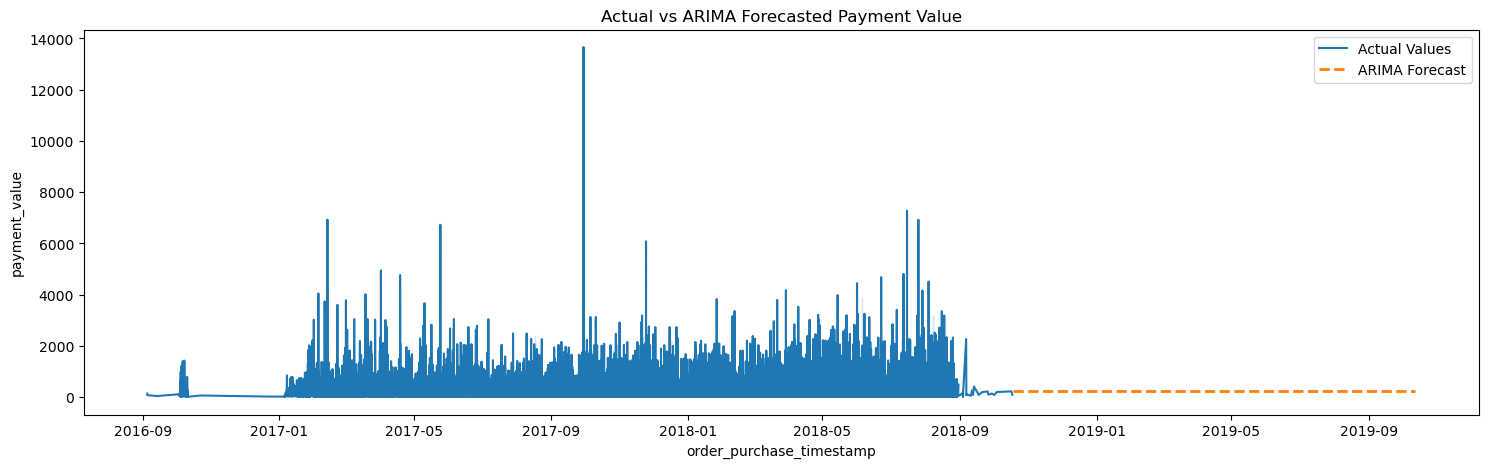

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_numeric(data):
    columns_to_convert = [
        "payment_sequential", "payment_installments", "customer_zip_code_prefix",
        "geolocation_zip_code_prefix", "geolocation_lat", "seller_zip_code_prefix",
        "order_item_id", "price", "freight_value", "product_description_lenght",
        "product_weight_g", "product_length_cm", "product_height_cm",
        "product_width_cm", "review_score", "year", "month", "day",
        "weekday", "payment_value_lag1"
    ]

    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    return data

def add_missing_features(data, model_features):
    for feature in model_features:
        if feature not in data.columns:
            data[feature] = 0
    return data

def get_feature_names(model):
    if isinstance(model, (CatBoostRegressor)):
        return model.feature_names_
    elif isinstance(model, (LGBMRegressor)):
        return model.feature_name_
    elif isinstance(model, (XGBRegressor)):
        return model.get_booster().feature_names
    elif isinstance(model, (ARIMA)):
        return ['order_purchase_timestamp'] # this could just be a placeholder
    else:
        raise ValueError("Model type not supported")


def forecast_period(df, model, period, n_periods):
    if isinstance(model, ARIMA):
        # Forecast directly using ARIMA
        series_data = df.sort_values(by='order_purchase_timestamp', ascending=True)['payment_value']

        # Check if the model is already fitted
        try:
            fitted_model = model.fittedvalues
        except:
            fitted_model = model.fit()

        # Forecast using the fitted model
#         forecasted_values, _, _ = fitted_model.forecast(steps=n_periods)
        forecasted_values = fitted_model.forecast(steps=n_periods).iloc[0]

        last_timestamp = df.sort_values(by='order_purchase_timestamp', ascending=True)['order_purchase_timestamp'].iloc[-1]
        forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(days=1), periods=n_periods)

        forecast_df = pd.DataFrame({
            'order_purchase_timestamp': forecast_dates,
            'forecasted_payment_value': forecasted_values
        })

        return forecast_df
    else:
        feature_names = get_feature_names(model)

        last_data = df.sort_values(by='order_purchase_timestamp', ascending=True).iloc[-1:].copy()
        last_data = add_missing_features(last_data, feature_names)
        last_data = last_data.iloc[0]

        forecasted_values = []

        timedelta_args = {}
        if period == 'day':
            timedelta_args['days'] = 1
        elif period == 'week':
            timedelta_args['weeks'] = 1
        elif period == 'month':
            timedelta_args['days'] = 30
        elif period == 'quarter':
            timedelta_args['days'] = 90

        for _ in range(n_periods):
            # 날짜 업데이트
            last_timestamp = df.sort_values(by='order_purchase_timestamp', ascending=True)['order_purchase_timestamp'].iloc[-1]

            if _ == 0:  # 첫 번째 loop일 경우
                last_data['order_purchase_timestamp'] = last_timestamp + pd.DateOffset(days=1)
            else:
                last_data['order_purchase_timestamp'] += pd.Timedelta(**timedelta_args)

            last_data = convert_to_numeric(last_data)  # Ensure the series is converted to numeric directly
            X = last_data[feature_names].to_frame().T

            if 'order_purchase_timestamp' in X.columns:
                X = X.drop(columns=['order_purchase_timestamp'])

            X = convert_to_numeric(X)

            forecasted_value = model.predict(X)[0]
            forecasted_values.append(forecasted_value)

            last_data['payment_value'] = forecasted_value

        last_timestamp = df.sort_values(by='order_purchase_timestamp', ascending=True)['order_purchase_timestamp'].iloc[-1]

        if period == 'day':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(days=1), periods=n_periods)
        elif period == 'week':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(weeks=1), periods=n_periods, freq='W')
        elif period == 'month':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(weeks=4), periods=n_periods, freq='M')
        elif period == 'quarter':
            forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(weeks=12), periods=n_periods, freq='Q')

        forecast_df = pd.DataFrame({
            'order_purchase_timestamp': forecast_dates,
            'forecasted_payment_value': forecasted_values
        })

    return forecast_df

# 예측하기
# forecasted_week = forecast_period(df_test, xgboost, period='week', n_periods=7)
# forecasted_month = forecast_period(df_test, xgboost, period='month', n_periods=4)
# forecasted_quarter = forecast_period(df_test, xgboost, period='quarter', n_periods=4)

def visualize_forecasts(df, models):

    periods = ['week', 'month', 'quarter']

    for model_name, model in models.items():
        plt.figure(figsize=(18, 5))

        # 실제 값 표시
        sns.lineplot(data=df, x='order_purchase_timestamp', y='payment_value', label='Actual Values')

        if isinstance(model, ARIMA):  # ARIMA 모델의 경우 따로 처리
            forecasted = forecast_period(df, model, period='day', n_periods=360)  # 예를 들어 90일 동안의 예측
            sns.lineplot(data=forecasted, x='order_purchase_timestamp', y='forecasted_payment_value',
                         label=f'{model_name} Forecast', linewidth=2, linestyle='--')
        else:
            for period in periods:
                forecasted = forecast_period(df, model, period=period, n_periods=7 if period == 'week' else 4)
                sns.lineplot(data=forecasted, x='order_purchase_timestamp', y='forecasted_payment_value',
                             label=f'{model_name} {period.capitalize()} Forecast', linewidth=1 if period != 'quarter' else 2,
                             linestyle='--' if period == 'quarter' else '-')

        plt.title('Actual vs ' + model_name + ' Forecasted Payment Value')
        plt.legend()
        plt.show()


# 각 모델에 대한 예측 시각화
models = {
#     "LightGBM": light_gbm,
#     "XGBoost": xgboost,
#     "CatBoost": catboost,
    "ARIMA": arima
}

visualize_forecasts(df_test, models)